In [1]:
import tensorflow as tf

%run utils.ipynb

In [2]:
def layer_learner (input_layers, internal_dimension, linear_layer):
    output_dimension = 2
    input_dimension = 2*input_layers
    internal_dimension_2 = 30

    global_step = tf.Variable (0, dtype=tf.int32, trainable = False, name = 'global_step')

    x = tf.placeholder (tf.float32, [None, input_dimension], name = 'input_ph')
    W1 = tf.Variable (tf.random_normal ([input_dimension,internal_dimension], stddev = 1/np.sqrt (internal_dimension)))
    b1 = tf.Variable (tf.zeros ([internal_dimension]))
    ya = tf.nn.leaky_relu (tf.add (tf.matmul (x, W1), b1))
    Wa = tf.Variable (tf.random_normal ([internal_dimension,internal_dimension], stddev = 1/np.sqrt (internal_dimension)))
    ba = tf.Variable (tf.zeros ([internal_dimension]))
    y2 = tf.nn.leaky_relu (tf.add (tf.matmul (ya, Wa), ba))
    if (not linear_layer):
        W2 = tf.Variable (tf.random_normal ([internal_dimension,output_dimension]))
        b2 = tf.Variable (tf.zeros ([output_dimension]))
        y = tf.nn.leaky_relu (tf.add (tf.matmul (y2, W2), b2))
    else:
        W2 = tf.Variable (tf.random_normal ([internal_dimension,internal_dimension_2]))
        b2 = tf.Variable (tf.zeros ([internal_dimension_2]))
        y3 = tf.nn.leaky_relu (tf.add (tf.matmul (y2, W2), b2))
        W3 = tf.Variable (tf.random_normal ([internal_dimension_2,output_dimension]))
        b3 = tf.Variable (tf.zeros ([output_dimension]))
        y = tf.add (tf.matmul (y3, W3), b3)
        

    y_target = tf.placeholder (tf.float32, [None, output_dimension], name = 'target_ph')

    mean_squared_error = tf.reduce_mean (tf.square (tf.subtract (y, y_target)))

    optimizer = tf.train.AdamOptimizer (learning_rate = 0.0002)
    minimize_op = optimizer.minimize (mean_squared_error, global_step = global_step)
    return (x, y, y_target, mean_squared_error, minimize_op)

In [3]:
input_layers = 6
internal_dimension = 400

(x, y, y_target, mean_squared_error, minimize_op) = layer_learner (input_layers, internal_dimension, True)

loss is ...
6.557988


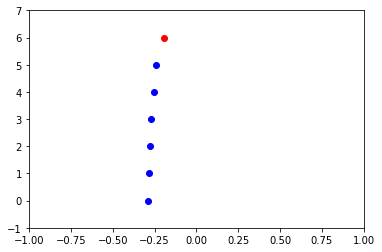

[-0.29047813 -0.01851483 -0.2842227  -0.04521333 -0.27754767 -0.07378833
 -0.26903104 -0.11145667 -0.25442286 -0.17316667 -0.23985106 -0.235     ]
[1.1947752 2.0038376]
[-0.19247227 -0.43991669]
0
loss is ...
0.83753717


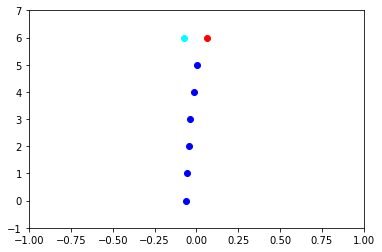

[-0.06158714 -0.02305242 -0.05409036 -0.05097533 -0.04623618 -0.0795
 -0.03504242 -0.11802667 -0.01669417 -0.18016666  0.00171998 -0.24433334]
[-0.07497205  0.7586407 ]
[ 0.06432195 -0.45866669]
1
loss is ...
1.3767985


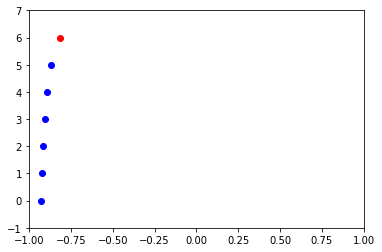

[-0.93050501 -0.01629058 -0.92333541 -0.03841042 -0.91567381 -0.06220284
 -0.90559237 -0.0924675  -0.88937431 -0.14116666 -0.87009326 -0.19916667]
[-1.6747736 -1.3314712]
[-0.81275439 -0.37043332]
2
loss is ...
2.1417775


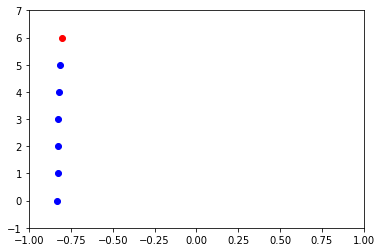

[-0.8306983  -0.00581854 -0.82896378 -0.01307342 -0.82695436 -0.02127083
 -0.82437075 -0.03151017 -0.8203235  -0.04733333 -0.81589574 -0.066     ]
[-3.001173 -2.056658]
[-0.80219104 -0.12133334]
3
loss is ...
2.1225593


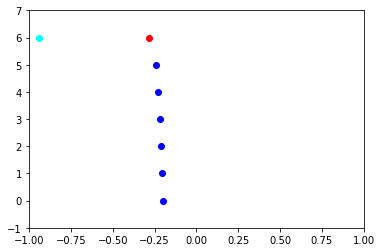

[-0.19865504 -0.03011617 -0.20396732 -0.06125608 -0.20939903 -0.09668083
 -0.21659829 -0.14197417 -0.22821849 -0.21316667 -0.24097145 -0.29066666]
[-0.9383672  -0.46742246]
[-0.28274932 -0.53950002]
4
loss is ...
0.88529587


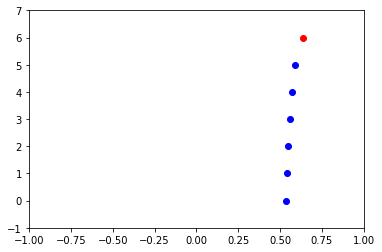

[0.53570422 0.00129948 0.54197011 0.00139323 0.54881868 0.00153386
 0.55737315 0.00195572 0.5718781  0.0025     0.58797011 0.0045    ]
[ 1.7099102 -0.5944159]
[0.63680285 0.0085    ]
5
loss is ...
1.32117


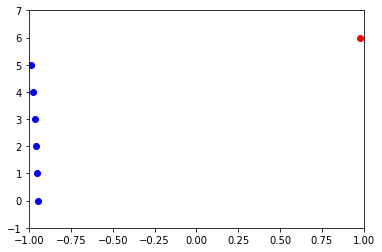

[-0.9476876  -0.0333795  -0.95201326 -0.05906041 -0.9574995  -0.08899417
 -0.96423826 -0.12595917 -0.97546968 -0.18516666 -0.98730857 -0.24899999]
[-2.462441  -0.0521677]
[ 0.97511394 -0.45266668]
6
loss is ...
0.4869929


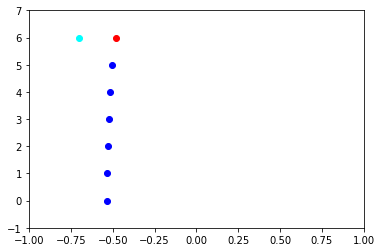

[-0.53513027 -0.01887058 -0.53172705 -0.04651883 -0.52788093 -0.07669434
 -0.52286307 -0.11467667 -0.51432671 -0.17783333 -0.50528846 -0.245     ]
[-0.7010871   0.06466781]
[-0.47754275 -0.45466665]
7
loss is ...
0.29135552


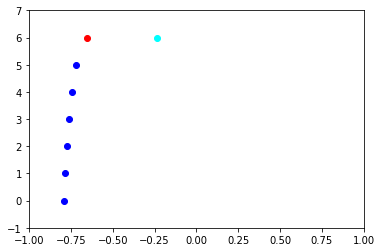

[-0.79184053  0.02236933 -0.78361131  0.04268733 -0.77415355  0.06458433
 -0.76182439  0.09335667 -0.74317732  0.13816667 -0.72010749  0.19191667]
[-0.2364537  1.3433381]
[-0.65029467  0.35583333]
8
loss is ...
0.8603338


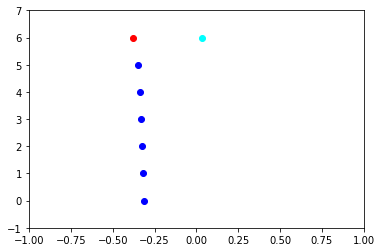

[-0.31546595  0.01505725 -0.31952131  0.04677475 -0.32412769  0.08289908
 -0.32993468  0.12819167 -0.33883818  0.19866666 -0.34890487  0.27699999]
[0.03445739 0.8166367 ]
[-0.38078898  0.52649999]
9
loss is ...
1.1313598


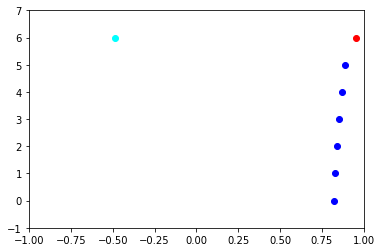

[ 0.8209521  -0.01531408  0.82958101 -0.03153708  0.83858057 -0.04882083
  0.85053501 -0.072235    0.86822187 -0.10733334  0.8897987  -0.15216667]
[-0.48443437  0.36332864]
[ 0.95239891 -0.27800001]
10
loss is ...
0.51556695


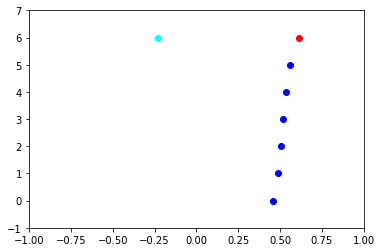

[0.45743502 0.014787   0.48968876 0.03055242 0.50572177 0.04856525
 0.51974406 0.07084583 0.53826446 0.10533333 0.55813201 0.14616666]
[-0.22756015  1.1488792 ]
[0.61479922 0.26699999]
11
loss is ...
0.65644634


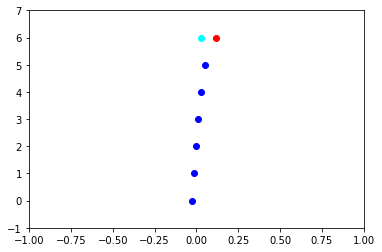

[-0.02302356  0.01445675 -0.01437194  0.022707   -0.0048724   0.03187158
  0.00769517  0.04393267  0.02688532  0.06158333  0.04900527  0.08233334]
[0.02598774 0.44385538]
[0.11931851 0.14416667]
12
loss is ...
0.29126987


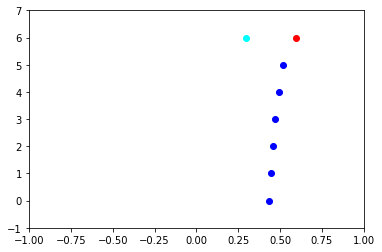

[ 0.43543757 -0.01150217  0.44606847 -0.03856433  0.45686597 -0.06634342
  0.4704109  -0.10433333  0.4925627  -0.16616666  0.51596784 -0.23      ]
[ 0.2940994 -0.6618518]
[ 0.59604281 -0.44695251]
13
loss is ...
0.23307541


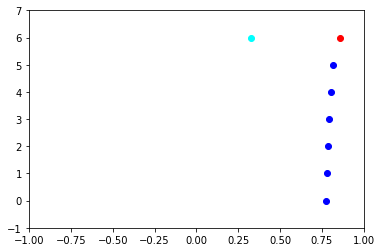

[ 0.77457436 -0.00331511  0.77888381 -0.00317448  0.78417661 -0.00289322
  0.79154233 -0.00233073  0.80296129 -0.0015      0.81675753 -0.0015    ]
[ 0.32357448 -0.15595306]
[0.85750327 0.0015    ]
14
loss is ...
0.36489278


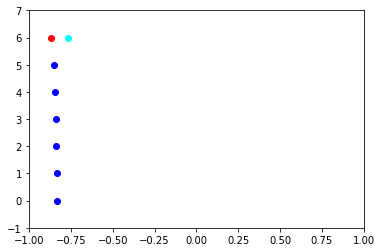

[-0.83213246  0.0016276  -0.83417925  0.00476822 -0.83657438  0.00829492
 -0.83972098  0.0127055  -0.84483901  0.0195     -0.85068694  0.0275    ]
[-0.76834196 -0.49502167]
[-0.86792796  0.05133333]
15
loss is ...
0.23665743


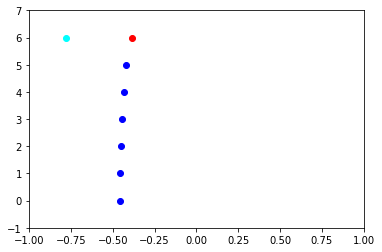

[-0.45892719  0.02544733 -0.45387899  0.04994975 -0.44854507  0.07815558
 -0.442207    0.11247334 -0.43223308  0.16816667 -0.42146687  0.22899999]
[-0.7763173   0.23217346]
[-0.38603483  0.42141668]
16
loss is ...
0.22686319


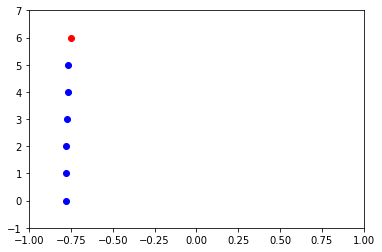

[-0.78146937  0.01147392 -0.77919314  0.02743658 -0.77689961  0.044719
 -0.77400249  0.06718667 -0.76949962  0.10233334 -0.76409394  0.14316667]
[-1.6684035  -0.14972065]
[-0.74830418  0.26199999]
17
loss is ...
0.7319512


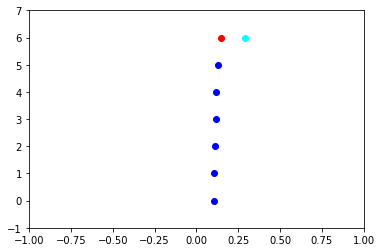

[0.10539938 0.00613384 0.10792224 0.01561808 0.11075811 0.02606242
 0.11451874 0.03957025 0.12027762 0.06033333 0.12686779 0.08333333]
[0.2917079 0.4035189]
[0.14643521 0.15416667]
18
loss is ...
0.26879793


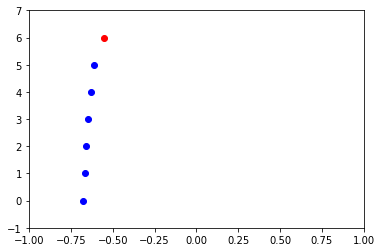

[-0.67553917  0.00316556 -0.66675904  0.00939058 -0.65822604  0.01609608
 -0.6471418   0.02471667 -0.62976459  0.0385     -0.61019959  0.05458333]
[-1.5087055  -0.04022052]
[-0.54966543  0.10433333]
19
loss is ...
0.5275053


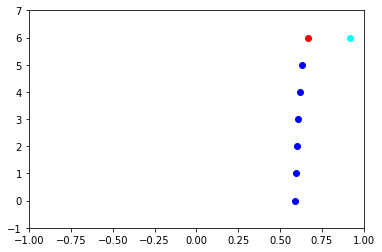

[ 0.59130901 -0.00168289  0.59601243 -0.01088767  0.60174412 -0.021013
  0.60868743 -0.03379508  0.6192992  -0.05333333  0.6320425  -0.07633333]
[0.91704595 0.12523054]
[ 0.66933469 -0.14416667]
20
loss is ...
0.20598158


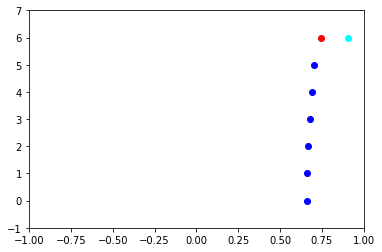

[ 0.65888263 -0.00978383  0.66356244 -0.01208075  0.66921162 -0.01468008
  0.67686986 -0.018       0.68958313 -0.0235      0.70334394 -0.0285    ]
[0.90630245 0.24699499]
[ 0.74378937 -0.04533333]
21
loss is ...
0.11338673


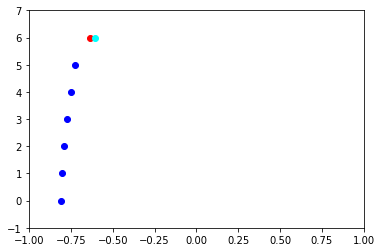

[-0.81107176  0.01403017 -0.80005025  0.02626425 -0.78801374  0.03931608
 -0.77405488  0.05607792 -0.75140843  0.08233334 -0.72398594  0.11633334]
[-0.60303545  0.8965149 ]
[-0.63658157  0.22      ]
22
loss is ...
0.09939646


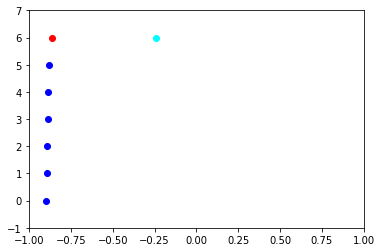

[-0.89756466  0.0041005  -0.89494925  0.0115275  -0.89227058  0.01963567
 -0.88880137  0.03019108 -0.8835434   0.04633333 -0.87748738  0.06433333]
[-0.24319254  0.824926  ]
[-0.85945582  0.12033333]
23
loss is ...
0.20617123


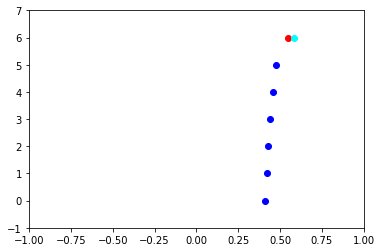

[0.41209834 0.00538324 0.42009763 0.01795375 0.42866344 0.032605
 0.43955922 0.051319   0.45700489 0.08033333 0.47849318 0.11633334]
[0.58388436 0.21102948]
[0.54573769 0.225     ]
24
loss is ...
0.11276026


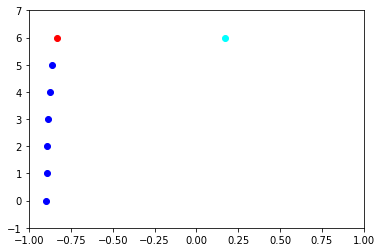

[-0.89891368  0.0108485  -0.89497069  0.02142942 -0.8903375   0.03291267
 -0.88445998  0.04782958 -0.87493932  0.07033333 -0.86388768  0.09733334]
[0.16927092 0.48275155]
[-0.83028787  0.17716667]
25
loss is ...
0.25285357


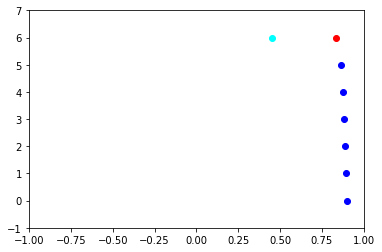

[0.89962316 0.02444817 0.89527543 0.04960867 0.8905432  0.07809759
 0.88451778 0.11308584 0.87501237 0.16966667 0.86492052 0.23100001]
[0.45200586 0.04808466]
[0.83297491 0.42466667]
26
loss is ...
0.20757672


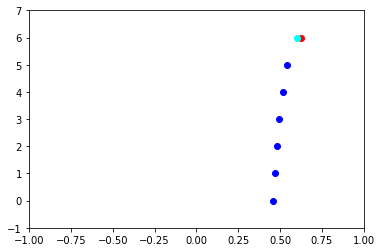

[0.45963392 0.01423858 0.46954145 0.03186058 0.4803719  0.05145917
 0.49410495 0.07662434 0.51537687 0.11433333 0.5419594  0.16016666]
[0.59987795 0.00312328]
[0.62465795 0.30811918]
27
loss is ...
0.13942967


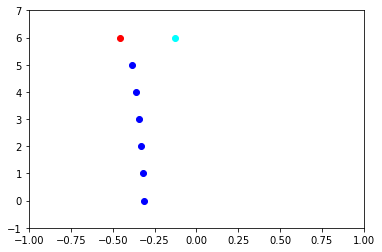

[-0.31203643  0.00524927 -0.32045445  0.0138335  -0.33038617  0.02358375
 -0.34276994  0.035597   -0.36250359  0.05433333 -0.38433612  0.07433333]
[-0.12762432 -0.1269256 ]
[-0.4543296   0.14116666]
28
loss is ...
0.09306637


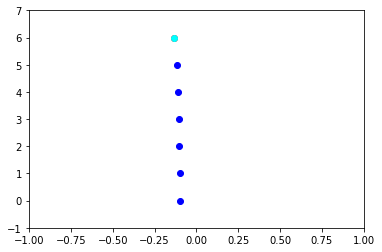

[-0.09820898  0.00317725 -0.10019537  0.01131108 -0.10234233  0.02036192
 -0.10521403  0.03163417 -0.10996104  0.05033333 -0.1153465   0.07033333]
[-0.13241816 -0.13840614]
[-0.13133582  0.13316667]
29
loss is ...
0.17415622


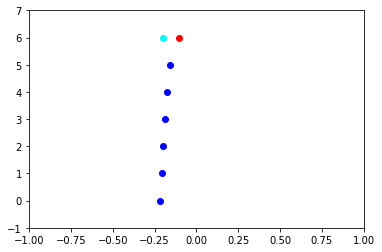

[-0.21421543 -0.01904567 -0.20733713 -0.04271425 -0.19998415 -0.06887025
 -0.19011337 -0.10266167 -0.1748437  -0.15716667 -0.15800529 -0.21600001]
[-0.20193365 -0.69921434]
[-0.10381608 -0.40426666]
30
loss is ...
0.10216431


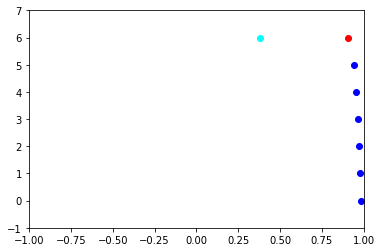

[ 0.9811963   0.00425261  0.97691866  0.00272875  0.97224357  0.00101822
  0.9660641  -0.00120573  0.95594319 -0.0045      0.94385693 -0.0095    ]
[0.37980908 0.1657528 ]
[ 0.90650405 -0.0215    ]
31
loss is ...
0.07212706


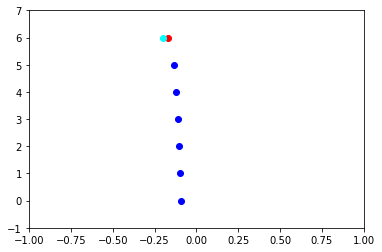

[-0.09177019 -0.020551   -0.09608197 -0.0445385  -0.1015612  -0.07114283
 -0.1084441  -0.10473417 -0.11970624 -0.16016666 -0.13171928 -0.21800001]
[-0.2004326  -0.29348782]
[-0.17041574 -0.40216667]
32
loss is ...
0.2375464


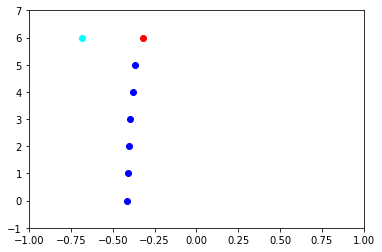

[-0.41529252  0.00295247 -0.40898739  0.00934742 -0.40214699  0.01643108
 -0.39357643  0.02551833 -0.37995804  0.0405     -0.36458231  0.05633333]
[-0.68226427  0.02998823]
[-0.31698846  0.10833333]
33
loss is ...
0.058964264


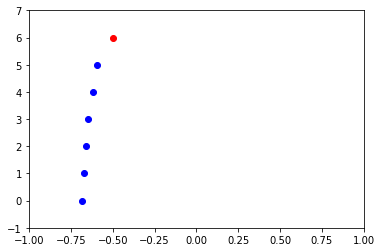

[-0.68585787 -0.00162761 -0.67395846 -0.00158073 -0.66177508 -0.00172135
 -0.64541187 -0.00158073 -0.6201854  -0.0015     -0.59220674 -0.0015    ]
[-1.044863    0.23766753]
[-0.49739127 -0.0005    ]
34
loss is ...
0.18592447


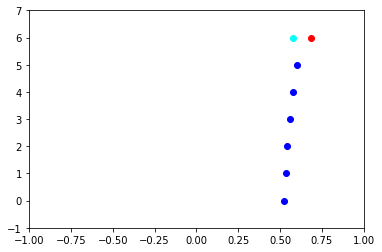

[ 0.52425856 -0.01378025  0.53324613 -0.03592375  0.54344947 -0.061249
  0.55651117 -0.09272083  0.57837644 -0.14516666  0.60346687 -0.20616666]
[ 0.57800215 -0.19034135]
[ 0.68253688 -0.39566666]
35
loss is ...
0.2053637


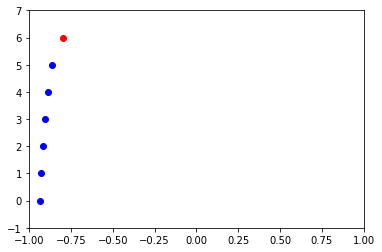

[-0.93393522 -0.00854017 -0.92506698 -0.01743933 -0.91614916 -0.02671133
 -0.90481834 -0.03838308 -0.88717889 -0.05633333 -0.86458231 -0.07833333]
[-1.2631313  0.6134197]
[-0.79582718 -0.14716667]
36
loss is ...
0.08100644


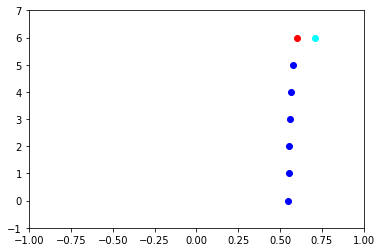

[0.54965673 0.01095283 0.55276276 0.02666317 0.55636215 0.04446525
 0.56087831 0.06681559 0.56787872 0.10133333 0.57609029 0.14216667]
[ 0.7071867  -0.06186183]
[0.59980131 0.2625    ]
37
loss is ...
0.037663497


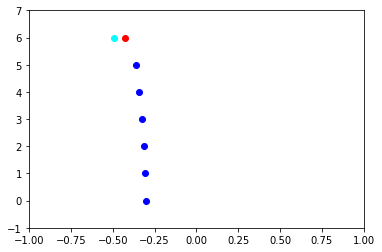

[-0.29863737 -0.01376925 -0.30619648 -0.03303625 -0.31439553 -0.05308208
 -0.32534233 -0.07989033 -0.34181045 -0.12033333 -0.36339441 -0.17316667]
[-0.49089736 -0.195034  ]
[-0.42407918 -0.32283333]
38
loss is ...
0.022465415


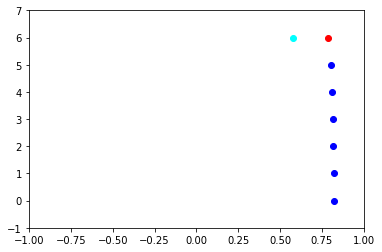

[0.82354026 0.02072458 0.82112266 0.05394258 0.81864149 0.08965333
 0.81576932 0.13377917 0.81096625 0.20566667 0.80561529 0.28600001]
[0.5799675  0.59846634]
[0.78920085 0.53049998]
39
loss is ...
0.048882294


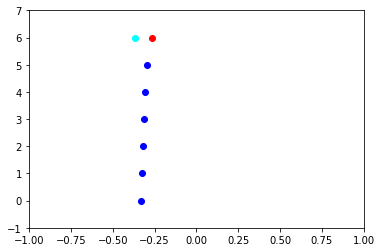

[-0.32862751  0.00317426 -0.32484     0.008809   -0.3205348   0.0150275
 -0.31507974  0.02294183 -0.30616359  0.0365     -0.29666887  0.04933333]
[-0.36410978 -0.11788372]
[-0.26763021  0.09133333]
40
loss is ...
0.096575394


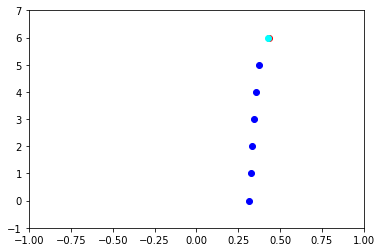

[ 0.31574751 -0.0119465   0.32352221 -0.02448125  0.33146808 -0.0375875
  0.34151293 -0.054832    0.35712029 -0.08066667  0.37571034 -0.11233334]
[0.42586684 0.15043987]
[ 0.43267977 -0.20816667]
41
loss is ...
0.1362386


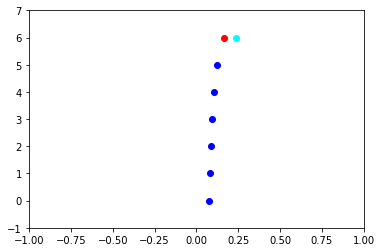

[ 0.07485395 -0.02151225  0.08054682 -0.04112267  0.08677321 -0.06223384
  0.09443325 -0.08916167  0.10687104 -0.13216667  0.12152066 -0.18216667]
[ 0.2366675 -0.1344973]
[ 0.16676276 -0.33343333]
42
loss is ...
0.25965458


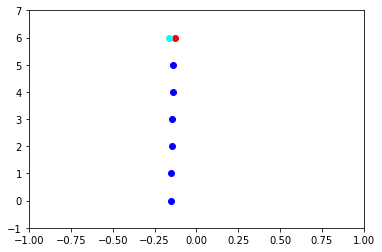

[-0.15157128  0.01573092 -0.14991873  0.03133842 -0.1480795   0.04885033
 -0.14573646  0.07065617 -0.14225459  0.10333333 -0.13801954  0.14316667]
[-0.16565424 -0.01931891]
[-0.12586068  0.26      ]
43
loss is ...
0.11997481


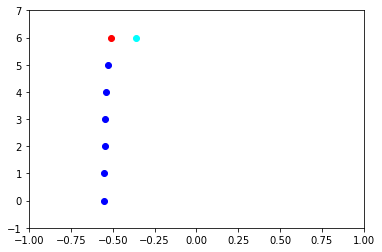

[-0.55457063 -0.0006734  -0.55164619 -0.00930442 -0.54841532 -0.01833433
 -0.54402081 -0.03008775 -0.53762172 -0.04833333 -0.53016984 -0.06933333]
[-0.36056802 -0.42139587]
[-0.50715519 -0.13316667]
44
loss is ...
0.110480145


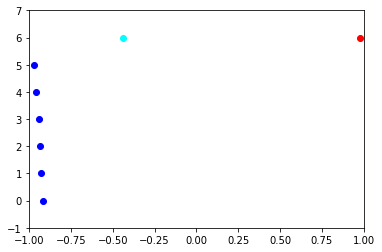

[-0.91859949 -0.00897083 -0.9258255  -0.02520092 -0.93252496 -0.04231283
 -0.94161114 -0.06497992 -0.9557096  -0.10083333 -0.97253455 -0.14116666]
[-0.43726054 -0.4262933 ]
[ 0.97669231 -0.26399999]
45
loss is ...
0.11768931


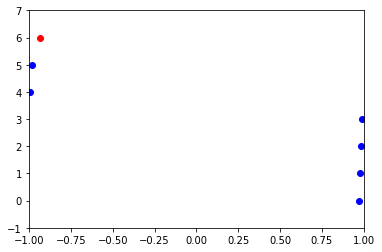

[ 0.96969833  0.00115885  0.97602449 -0.00238768  0.98309758 -0.00614586
  0.99144994 -0.01090883 -0.99508288 -0.0185     -0.97893529 -0.0275    ]
[-2.449455  -0.9098936]
[-0.93134853 -0.05433333]
46
loss is ...
0.08622502


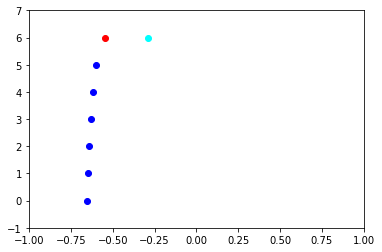

[-0.65495308  0.00241158 -0.64808275 -0.00427136 -0.64032735 -0.01158975
 -0.63079919 -0.02099717 -0.61569252 -0.0365     -0.59961293 -0.05333333]
[-0.28963354  0.13262826]
[-0.54459643 -0.10733334]
47
loss is ...
1.3608224


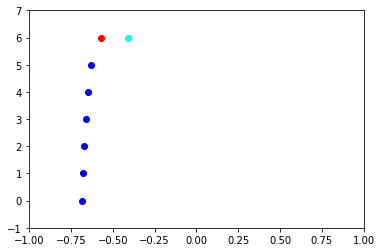

[-0.68345356  0.01052542 -0.67718469  0.02138025 -0.67032585  0.03295158
 -0.66056728  0.04812075 -0.64605963  0.07033333 -0.62798037  0.09733334]
[-0.4061504  0.3851268]
[-0.57089944  0.17916667]
48
loss is ...
0.07685642


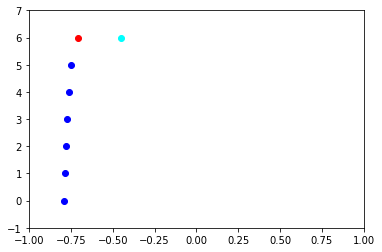

[-0.79287558  0.00884633 -0.78734021  0.01256425 -0.78130371  0.01658075
 -0.7733633   0.02169008 -0.76079573  0.0305     -0.7476983   0.0385    ]
[-0.4480264  0.4288229]
[-0.70521099  0.06833333]
49
loss is ...
0.09570781


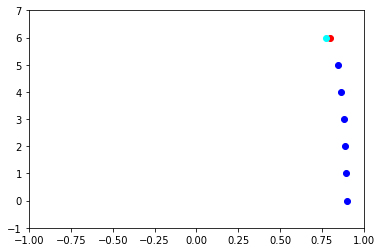

[0.9023513  0.005283   0.89585308 0.00645112 0.88870316 0.00772963
 0.87934932 0.00926825 0.86490522 0.0115     0.8478588  0.0145    ]
[0.7740673  0.42265317]
[0.79795963 0.0225    ]
50
loss is ...
0.035127364


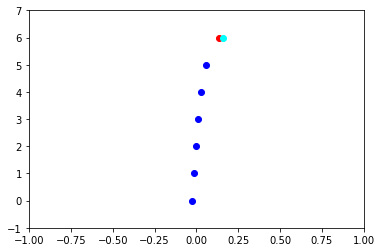

[-0.02558532 -0.00830395 -0.01580937 -0.02845975 -0.00507147 -0.05088333
  0.00890363 -0.07973459  0.03020978 -0.12433333  0.05511123 -0.17716667]
[ 0.16007297 -0.43175325]
[ 0.13585089 -0.34383334]
51
loss is ...
0.2759006


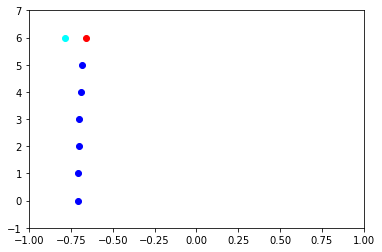

[-0.7086344   0.0145235  -0.70546026  0.022672   -0.70230574  0.03183825
 -0.6981325   0.04354658 -0.69186008  0.06133333 -0.68410249  0.08333333]
[-0.7839615   0.22323173]
[-0.661034    0.14716667]
52
loss is ...
0.36229903


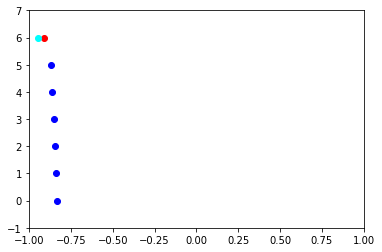

[-0.83178501 -0.00644502 -0.83666206 -0.00990033 -0.84224643 -0.01380675
 -0.84862871 -0.01858067 -0.85942216 -0.0265     -0.8710639  -0.0345    ]
[-0.94799876 -0.01700861]
[-0.90781019 -0.06033333]
53
loss is ...
0.03443049


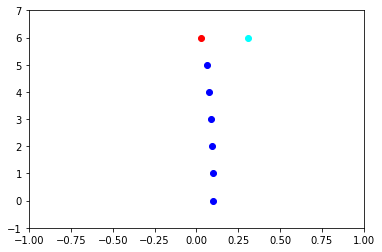

[ 0.10096831 -0.02056867  0.09661339 -0.0490155   0.09192866 -0.07985542
  0.0856947  -0.11956917  0.07558934 -0.18216667  0.06433669 -0.25100001]
[ 0.3066274 -0.6612369]
[ 0.0301236  -0.46366669]
54
loss is ...
0.16160384


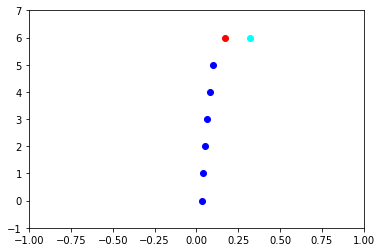

[0.0338426  0.00151526 0.0412875  0.00289322 0.05018233 0.00448698
 0.06092062 0.00645573 0.07991054 0.0095     0.1017166  0.0135    ]
[ 0.32253546 -0.05111986]
[0.16895269 0.0235    ]
55
loss is ...
0.068781585


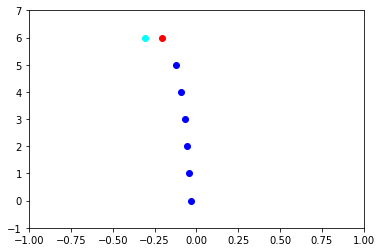

[-0.03448671  0.00251823 -0.04389947  0.00261198 -0.05531135  0.00261198
 -0.06962394  0.0025651  -0.09249456  0.0035     -0.12009298  0.0045    ]
[-0.30406222  0.18516912]
[-0.20808757  0.0085    ]
56
loss is ...
0.027466264


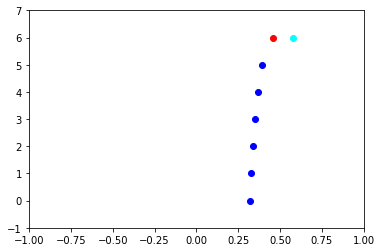

[ 0.31940294 -0.00077229  0.32746941  0.01050942  0.33655203  0.02265175
  0.3483127   0.03867608  0.36724175  0.06333333  0.39012816  0.09233334]
[0.5775292  0.15346023]
[0.45817848 0.17716667]
57
loss is ...
0.12797937


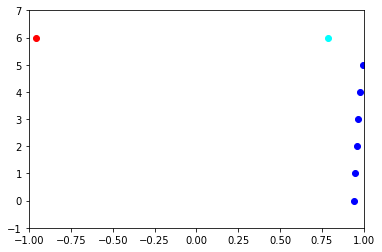

[0.9439645  0.00279947 0.95015856 0.00722574 0.95699081 0.011784
 0.96592513 0.01789425 0.98015017 0.0275     0.99632424 0.0395    ]
[0.7839661  0.61392784]
[-0.95611146  0.07433333]
58
loss is ...
0.20423484


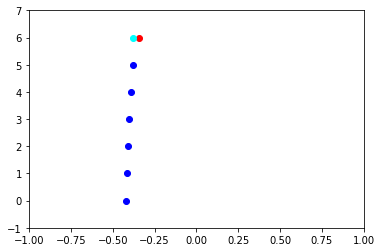

[-0.41950462  0.00620167 -0.4149612   0.01629292 -0.40936836  0.027185
 -0.40249812  0.04101092 -0.39200779  0.06233334 -0.37938989  0.08733334]
[-0.37891084  0.11370087]
[-0.34092721  0.16316667]
59
loss is ...
0.043238956


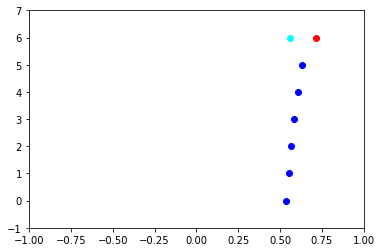

[0.53670313 0.01549108 0.55422489 0.03153183 0.56792769 0.04965475
 0.58333215 0.0729755  0.6049297  0.10833333 0.63201895 0.15416667]
[0.5586756  0.62881917]
[0.71209048 0.28600001]
60
loss is ...
0.097932994


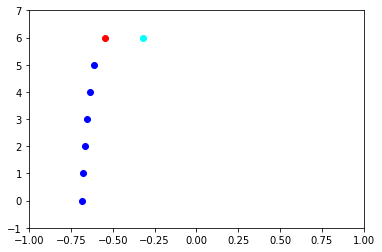

[-0.68287066  0.0159565  -0.67443621  0.04292867 -0.66470725  0.07175325
 -0.65291106  0.10911833 -0.63402732  0.16816667 -0.61236198  0.23600001]
[-0.32069722  0.67440313]
[-0.5454548   0.44700002]
61
loss is ...
0.37092918


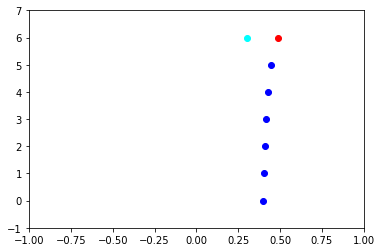

[ 0.39683646 -0.03294842  0.40263442 -0.0613655   0.40888644 -0.09351083
  0.41754159 -0.13582583  0.43082036 -0.20216667  0.4447269  -0.27333333]
[ 0.30200607 -0.45897663]
[ 0.48915065 -0.50549998]
62
loss is ...
0.13049589


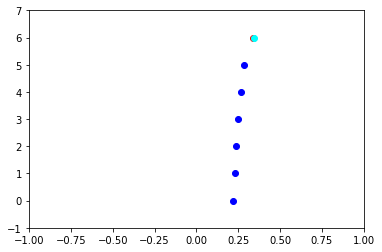

[0.22004757 0.02181617 0.22796108 0.04792742 0.23691833 0.07771875
 0.24750528 0.11371333 0.26391793 0.17183333 0.28298551 0.23800001]
[0.34259   0.2280452]
[0.33997908 0.43726664]
63
loss is ...
0.041176684


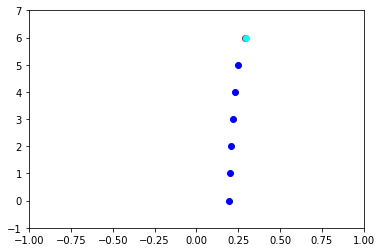

[ 0.19455378 -0.0036155   0.20107081 -0.00767448  0.20819087 -0.01212758
  0.21655108 -0.01801875  0.23043732 -0.0275      0.2462558  -0.0385    ]
[ 0.29832223 -0.09826805]
[ 0.29324446 -0.07233334]
64
loss is ...
0.123121716


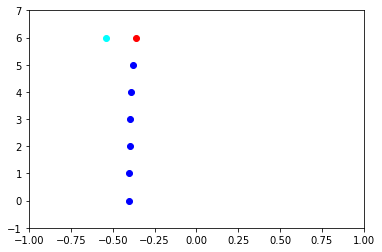

[-0.40401787 -0.02139417 -0.40114113 -0.0431455  -0.39804396 -0.06669525
 -0.39405041 -0.09726667 -0.38783306 -0.14583333 -0.38085733 -0.20066667]
[-0.5419844  -0.37657756]
[-0.35979451 -0.36683334]
65
loss is ...
0.20979519


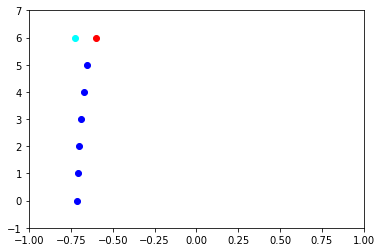

[-0.71479227  0.02220383 -0.70753461  0.0464975  -0.69946325  0.07403575
 -0.68923822  0.10972333 -0.67338508  0.16550001 -0.65592351  0.22725001]
[-0.7229724   0.30699039]
[-0.60088699  0.42166667]
66
loss is ...
0.024567693


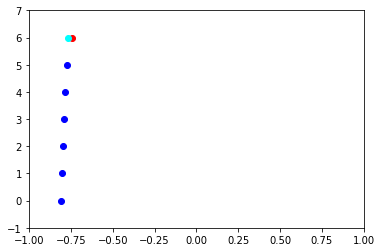

[-0.80566883  0.00972425 -0.80142098  0.01969183 -0.79701726  0.03035
 -0.79148682  0.04405992 -0.7829057   0.06533333 -0.77288177  0.08933333]
[-0.76968956 -0.17897944]
[-0.74153014  0.16416667]
67
loss is ...
0.14370675


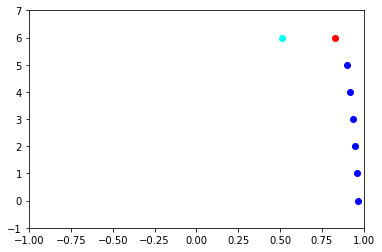

[ 0.96779205 -0.01848017  0.95946382 -0.051249    0.9504256  -0.08588833
  0.93782918 -0.13162084  0.91878403 -0.20316667  0.89849033 -0.28024999]
[ 0.50976473 -0.136092  ]
[ 0.83065147 -0.5325    ]
68
loss is ...
0.2529222


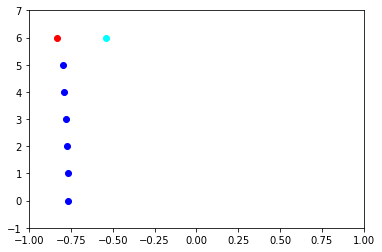

[-0.76415378 -0.00279948 -0.76816818 -0.00279948 -0.77293116 -0.00275261
 -0.77894323 -0.00261198 -0.78810835 -0.0025     -0.79880315 -0.0015    ]
[-0.53900135 -0.22411138]
[-8.30800732e-01 -4.99997487e-04]
69
loss is ...
0.021194864


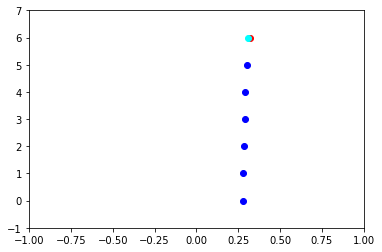

[ 0.27851116 -0.00588928  0.28108876 -0.0200335   0.28392208 -0.03599642
  0.28767202 -0.05635767  0.29357548 -0.08833333  0.30002728 -0.12333333]
[ 0.310841   -0.09629381]
[ 0.32002332 -0.23166667]
70
loss is ...
0.018221281


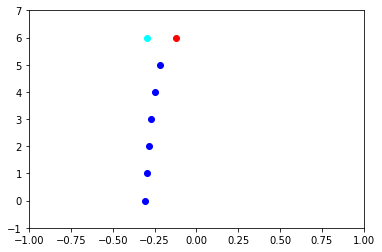

[-0.30810494 -0.00972442 -0.29679057 -0.01832917 -0.28557887 -0.02749542
 -0.2706822  -0.03961792 -0.24734639 -0.05833333 -0.21698007 -0.08233334]
[-0.2929933 -0.2422102]
[-0.11996613 -0.16241666]
71
loss is ...
0.01788549


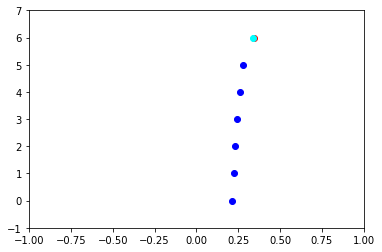

[ 0.21356906 -0.02424833  0.22212584 -0.0546275   0.23157846 -0.08886417
  0.24277333 -0.13161833  0.26062607 -0.19916667  0.28153342 -0.27800001]
[ 0.33895484 -0.3801378 ]
[ 0.34720664 -0.52549998]
72
loss is ...
0.17686848


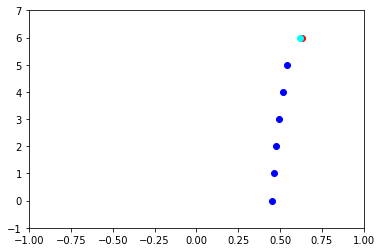

[ 0.45395171 -0.01606125  0.46452186 -0.02910075  0.47745999 -0.04324567
  0.49245213 -0.06113133  0.51547506 -0.08933333  0.542996   -0.12133334]
[ 0.62021893 -0.17336285]
[ 0.63362103 -0.2275    ]
73
loss is ...
0.4401865


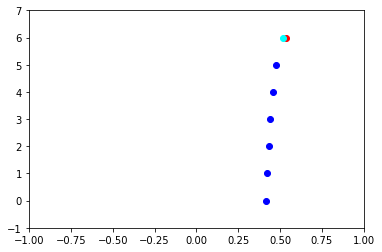

[ 0.41433505 -0.01212925  0.42244154 -0.02647633  0.43140603 -0.04281458
  0.44193773 -0.06301392  0.45838687 -0.09433333  0.47824401 -0.13216667]
[ 0.5194884  -0.18109441]
[ 0.53721492 -0.24139999]
74
loss is ...
0.07998704


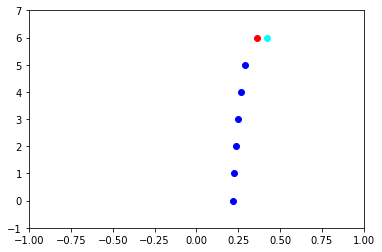

[0.21827078 0.0112745  0.22754523 0.023072   0.23706619 0.03633875
 0.24848194 0.05253983 0.2674369  0.07833333 0.28941307 0.10733334]
[0.41964886 0.18112838]
[0.35996745 0.20416667]
75
loss is ...
0.090740375


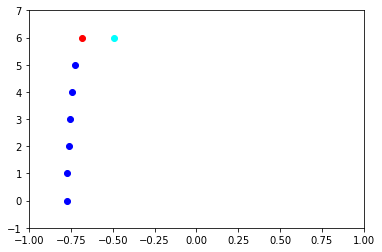

[-0.77516824 -0.01564825 -0.76997658 -0.02731267 -0.7632498  -0.04053225
 -0.75500663 -0.05670783 -0.74255138 -0.08133333 -0.72715965 -0.11183333]
[-0.49086198 -0.18351477]
[-0.68085218 -0.20116666]
76
loss is ...
0.01924625


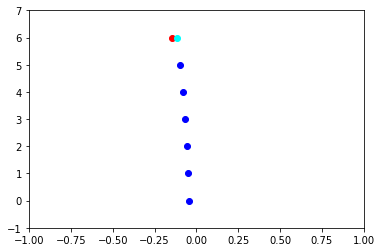

[-0.04529016 -0.02572158 -0.05161458 -0.05719392 -0.05790227 -0.08968583
 -0.06684304 -0.13319083 -0.0805386  -0.20116666 -0.09565147 -0.27600001]
[-0.11320144 -0.19758025]
[-0.14340675 -0.51850001]
77
loss is ...
0.0563995


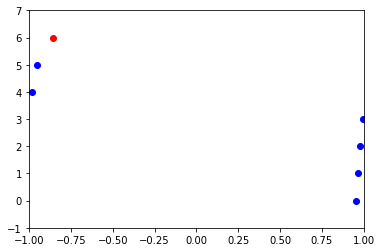

[ 0.95394984 -0.01938433  0.96597833 -0.04143658  0.97860519 -0.0651145
  0.99342289 -0.09561333 -0.98126444 -0.14416667 -0.95228623 -0.20016666]
[-1.0423994  -0.30379012]
[-0.85547882 -0.3795475 ]
78
loss is ...
0.22058062


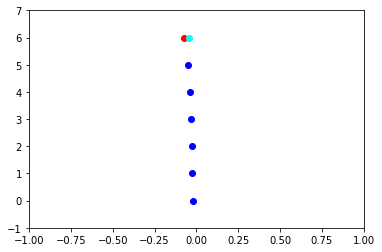

[-0.02149285 -0.01704525 -0.02446691 -0.03471567 -0.02800109 -0.054396
 -0.0324456  -0.078481   -0.03939438 -0.11633334 -0.04800611 -0.16266666]
[-0.04605977 -0.18883575]
[-0.07208857 -0.29300001]
79
loss is ...
0.12953003


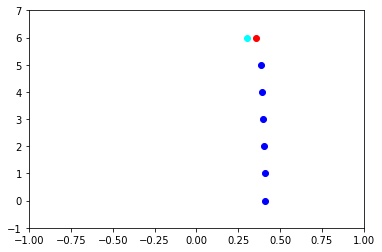

[0.41260666 0.00802741 0.40905092 0.01549142 0.40502325 0.0238135
 0.40006272 0.03435558 0.39200041 0.05133333 0.38347103 0.06933333]
[0.30333382 0.19313984]
[0.35785724 0.12466667]
80
loss is ...
0.21773848


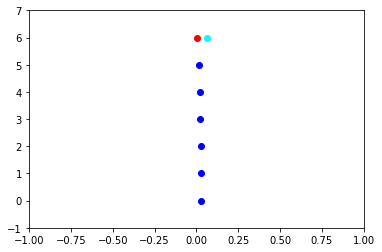

[ 0.02833944 -0.01115433  0.02695563 -0.02373542  0.02533553 -0.03759525
  0.02316869 -0.0552545   0.0198374  -0.08233334  0.01589741 -0.11433333]
[ 0.06335086 -0.2985578 ]
[ 0.00423727 -0.21016666]
81
loss is ...
0.11264706


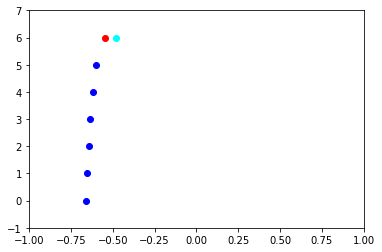

[-0.65771998 -0.00704247 -0.65163417 -0.02066608 -0.64396158 -0.03575283
 -0.63379972 -0.05479891 -0.61828954 -0.08433333 -0.60060524 -0.11733334]
[-0.48220798 -0.26331505]
[-0.54298387 -0.22100001]
82
loss is ...
0.103596054


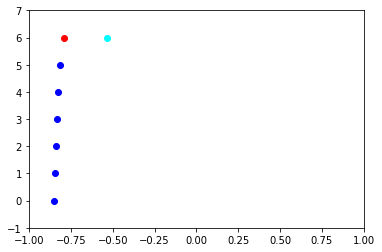

[-0.84893311 -0.00390333 -0.8451668  -0.02397042 -0.84078894 -0.04687725
 -0.83536764 -0.07494658 -0.82708371 -0.11933333 -0.81743621 -0.17116666]
[-0.53116405 -0.10852002]
[-0.78836285 -0.32883334]
83
loss is ...
0.11538782


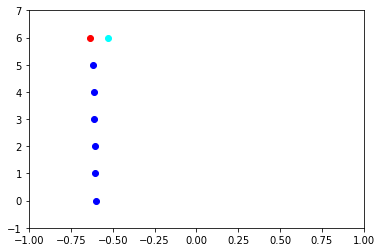

[-0.60221499 -0.00979375 -0.60434832 -0.0231805  -0.60657596 -0.03808575
 -0.60937585 -0.05695066 -0.61356191 -0.08633333 -0.61841081 -0.11983334]
[-0.52538335  0.02609123]
[-0.63314821 -0.22100001]
84
loss is ...
0.09439452


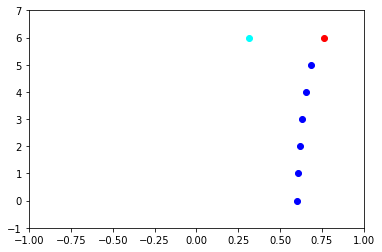

[0.59869962 0.0141855  0.60833387 0.02942308 0.62004294 0.04677383
 0.63367797 0.06788625 0.65567122 0.10133333 0.68319808 0.14216667]
[0.3164864  0.21145236]
[0.76526179 0.27      ]
85
loss is ...
0.191613


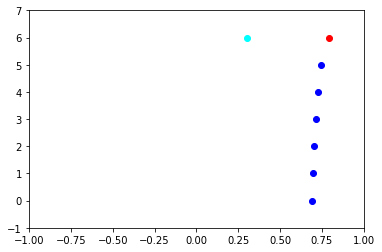

[ 0.69110253 -0.01628075  0.69741429 -0.03082808  0.70423143 -0.04648517
  0.71336913 -0.06628133  0.72729885 -0.09833333  0.74429887 -0.13616666]
[ 0.30381247 -0.29937935]
[ 0.79402658 -0.24800001]
86
loss is ...
0.3097253


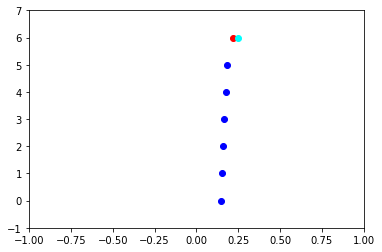

[ 0.14996286 -0.01531825  0.15385331 -0.04060067  0.15850703 -0.0690755
  0.1645083  -0.10476166  0.17433776 -0.16216667  0.18496705 -0.22399999]
[ 0.2513201 -0.5428713]
[ 0.22043614 -0.42016668]
87
loss is ...
0.09595289


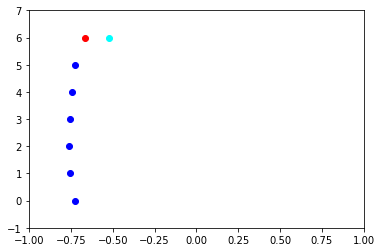

[-0.72412596  0.2213475  -0.75715096  0.226235   -0.7614225   0.23196332
 -0.75668846  0.23889834 -0.74329173  0.25       -0.72450791  0.26300001]
[-0.521715   0.7179552]
[-0.66241012  0.30383334]
88
loss is ...
0.3594379


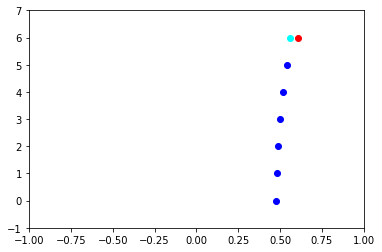

[ 0.47491834 -0.00871358  0.48220014 -0.01373258  0.49071388 -0.01925258
  0.50219288 -0.02645458  0.5201386  -0.0375      0.53969705 -0.04933333]
[ 0.5607689  -0.02417232]
[ 0.6042952  -0.08533333]
89
loss is ...
0.16359405


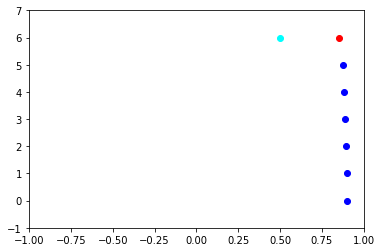

[ 0.90139026 -0.01232717  0.89825365 -0.02712108  0.89470049 -0.0436825
  0.89016512 -0.06414467  0.88277383 -0.09733334  0.87448652 -0.13616666]
[ 0.5009211 -0.241265 ]
[ 0.85016372 -0.24833333]
90
loss is ...
0.014802885


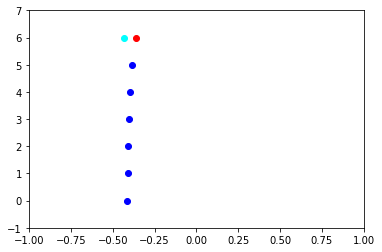

[-0.41372674  0.00654948 -0.41009938  0.00753385 -0.40638793  0.00856508
 -0.4016115   0.00997133 -0.39391025  0.0125     -0.38510112  0.0155    ]
[-0.4305199  -0.10565217]
[-0.35842913  0.0235    ]
91
loss is ...
0.05519464


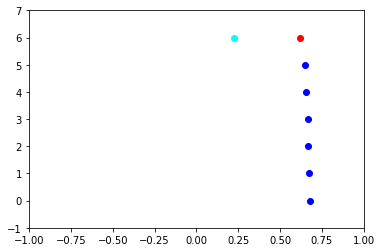

[ 0.67630795 -0.02502133  0.6732119  -0.0516895   0.66932216 -0.08159233
  0.66433509 -0.119245    0.6561379  -0.17916667  0.64691079 -0.245     ]
[ 0.22474691 -0.6015472 ]
[ 0.61786218 -0.45166667]
92
loss is ...
0.10057028


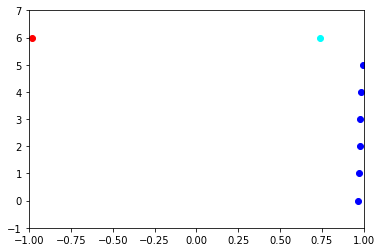

[0.96853084 0.035895   0.97160866 0.0694495  0.97489001 0.106075
 0.9789947  0.15220833 0.98542725 0.225      0.99327826 0.31116666]
[0.7407803  0.49796385]
[-0.98421868  0.55966665]
93
loss is ...
0.07774669


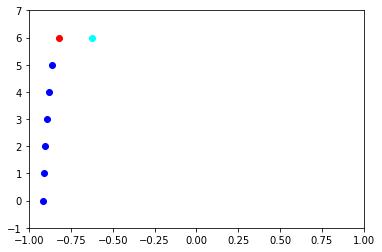

[-0.91520307  0.01396508 -0.90944038  0.03201608 -0.90309667  0.05187692
 -0.89421519  0.07788075 -0.8807008   0.11633334 -0.86416257  0.16483334]
[-0.6225323  -0.04499792]
[-0.81817365  0.30408333]
94
loss is ...
0.11369793


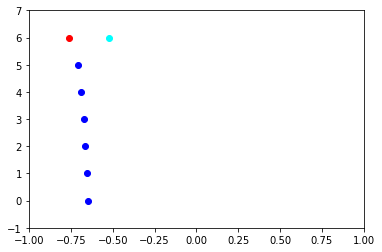

[-0.64874108 -0.0273235  -0.65566682 -0.05963284 -0.66305084 -0.09492833
 -0.67277181 -0.14063499 -0.68849808 -0.21216667 -0.70590631 -0.29199999]
[-0.52089643 -0.52212495]
[-0.76157843 -0.55049998]
95
loss is ...
0.107162595


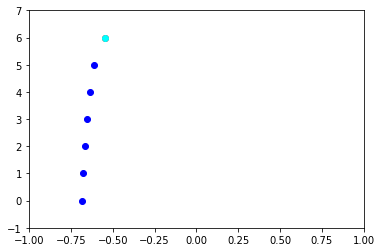

[-0.68242183 -0.02904442 -0.67520028 -0.05665066 -0.66702117 -0.0852325
 -0.65512564 -0.12362667 -0.63592008 -0.18366666 -0.61340231 -0.25300001]
[-0.5448494  -0.41083956]
[-0.54686542 -0.46366669]
96
loss is ...
0.37308395


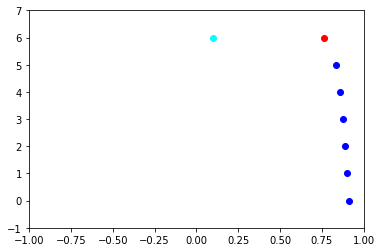

[ 0.90976087 -0.00439323  0.9000265  -0.00584636  0.89032801 -0.00720573
  0.87848124 -0.00912758  0.85887146 -0.0125      0.83538676 -0.0165    ]
[0.1020906  0.03476788]
[ 0.76135691 -0.0285    ]
97
loss is ...
0.025861824


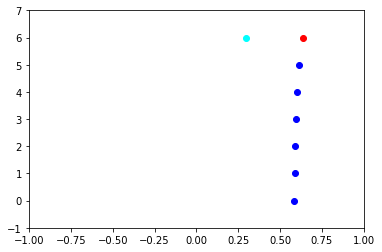

[ 0.58378648 -0.00594592  0.58754783 -0.01982642  0.59125877 -0.03491358
  0.59611508 -0.05416308  0.60349534 -0.08233334  0.61253324 -0.11699999]
[ 0.2960006  -0.19411936]
[ 0.63980539 -0.22033333]
98
loss is ...
0.042191558


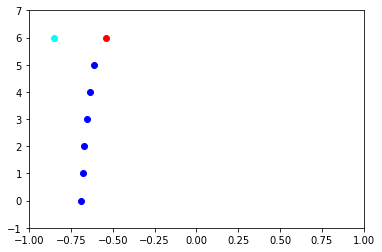

[-0.68738988 -0.0075498  -0.67836074 -0.01814558 -0.66896885 -0.02930075
 -0.65619775 -0.04380033 -0.63747456 -0.06633333 -0.61388754 -0.09333333]
[-0.8484647  -0.03761059]
[-0.54092524 -0.17816667]
99
loss is ...
0.023449415


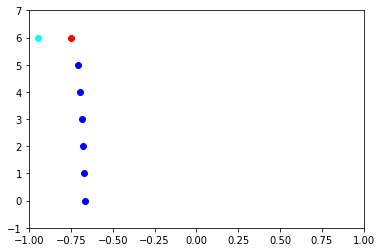

[-0.66277794  0.01653433 -0.66852512  0.03258092 -0.67461107  0.04963492
 -0.68223686  0.07181883 -0.69358837  0.10533333 -0.70780618  0.14550001]
[-0.9473143   0.39015955]
[-0.75039526  0.26600001]
100
loss is ...
0.08213529


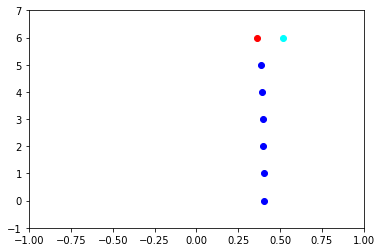

[0.40631716 0.0124315  0.40322264 0.02472467 0.40024835 0.03849775
 0.39660224 0.05598417 0.39104391 0.08383333 0.38479233 0.11483334]
[0.5168374  0.24535999]
[0.36527172 0.20949999]
101
loss is ...
0.1255172


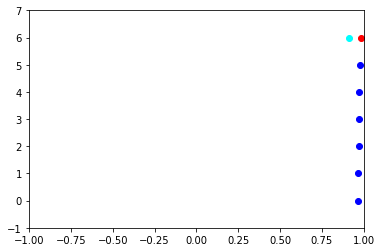

[ 0.96613473 -0.010696    0.96739759 -0.02720983  0.96865441 -0.0454765
  0.97011181 -0.06763975  0.97252537 -0.10333333  0.97537459 -0.14516666]
[ 0.910717  -0.5294714]
[ 0.98379673 -0.26600001]
102
loss is ...
0.1014907


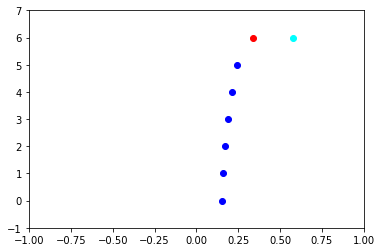

[0.15058418 0.00764028 0.16101635 0.01768392 0.17281998 0.02898508
 0.18762573 0.043698   0.21154224 0.06633333 0.24210918 0.09533333]
[0.57732695 0.23329133]
[0.33753251 0.18516666]
103
loss is ...
0.039880663


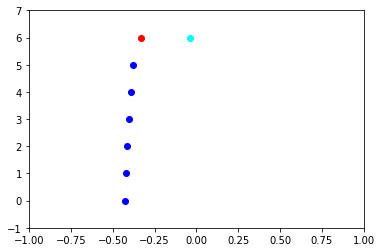

[-0.42444665  0.02222642 -0.41815625  0.05201517 -0.41194047  0.08471
 -0.40379929  0.12523917 -0.39108014  0.18966667 -0.37681849  0.26199999]
[-0.04028654  0.43690425]
[-0.33170002  0.48649999]
104
loss is ...
0.090480156


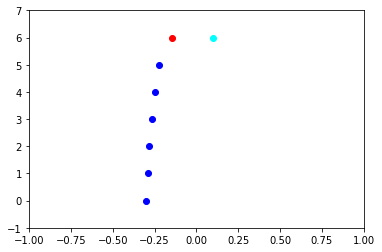

[-0.30175847  0.01279842 -0.29150332  0.03573058 -0.28075927  0.06046825
 -0.26763815  0.0925125  -0.24728402  0.14216667 -0.22270706  0.20216667]
[0.10038717 0.3464894 ]
[-0.14828556  0.38166667]
105
loss is ...
0.09742035


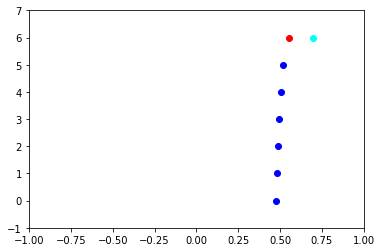

[0.47678299 0.00485224 0.48134722 0.01472    0.48634932 0.02556425
 0.49299498 0.03945342 0.5035943  0.06033333 0.51648369 0.086     ]
[0.6939585  0.26611513]
[0.55509165 0.16216667]
106
loss is ...
0.12794594


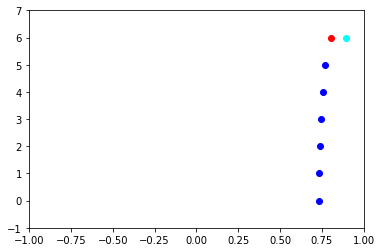

[0.73144659 0.01321658 0.73558207 0.0323605  0.74047805 0.05396809
 0.74654876 0.08124158 0.75606655 0.12183333 0.7679707  0.17316667]
[0.8952722  0.39822423]
[0.80276299 0.32283333]
107
loss is ...
0.021746496


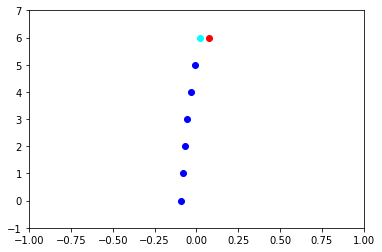

[-0.08953879 -0.01609    -0.07955453 -0.04230325 -0.06913412 -0.07227883
 -0.05551717 -0.10932749 -0.03300853 -0.17066667 -0.00764762 -0.24      ]
[ 0.02341088 -0.4635077 ]
[ 0.07642119 -0.46166667]
108
loss is ...
0.044902045


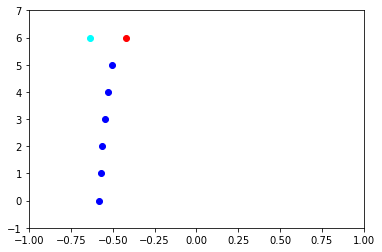

[-0.58162505 -0.0193465  -0.57173602 -0.04585967 -0.56119231 -0.07604617
 -0.54837832 -0.11470333 -0.52648161 -0.17816667 -0.50210736 -0.25100001]
[-0.6374847 -0.6035773]
[-0.42131674 -0.48450002]
109
loss is ...
0.035682634


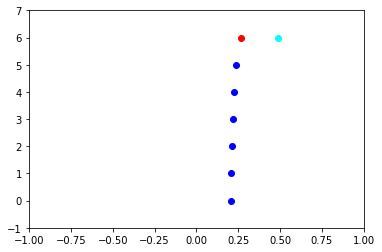

[0.20425806 0.01487575 0.20869857 0.03680875 0.21315747 0.06067867
 0.21880374 0.09092417 0.22789638 0.13966667 0.23810108 0.19449999]
[0.4890742 0.2337068]
[0.26915448 0.35933334]
110
loss is ...
0.12803867


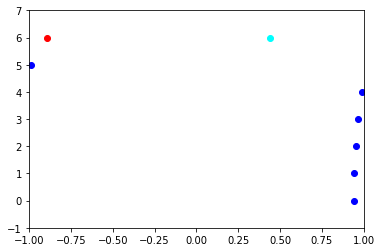

[ 0.94333767  0.36334249  0.94388154  0.37597666  0.95216745  0.38912084
  0.96493134  0.40695582  0.98807239  0.43566666 -0.98544025  0.46866669]
[0.43922392 1.6747005 ]
[-0.89194213  0.57933334]
111
loss is ...
0.036041375


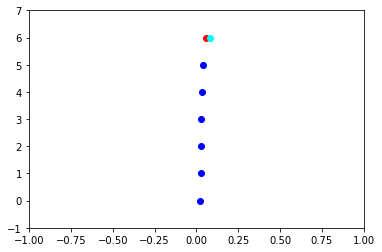

[ 0.02399224 -0.0097115   0.02577616 -0.02722108  0.02788034 -0.046503
  0.03072751 -0.07161584  0.03504184 -0.11033333  0.03998888 -0.15516666]
[ 0.08184621 -0.2689095 ]
[ 0.05499059 -0.28899999]
112
loss is ...
0.14970024


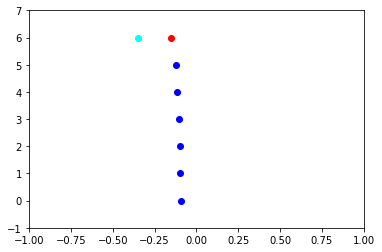

[-0.09275877  0.00448698 -0.09610686  0.00824905 -0.10022523  0.01242342
 -0.10550065  0.01754275 -0.11454888  0.0265     -0.12415641  0.0355    ]
[-0.3514596   0.18614969]
[-0.15301608  0.06433333]
113
loss is ...
0.10091531


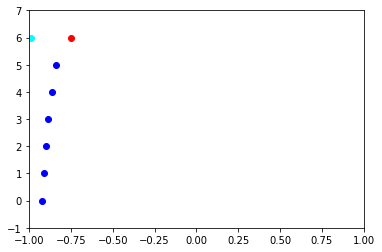

[-0.92122056 -0.01337267 -0.91089654 -0.03278917 -0.89950749 -0.05384542
 -0.88509779 -0.08096167 -0.86279214 -0.12383334 -0.83584261 -0.17476667]
[-0.98661196 -0.09308439]
[-0.74917081 -0.33445834]
114
loss is ...
0.060399096


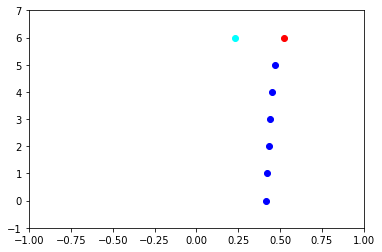

[ 0.41776218 -0.01834633  0.42387253 -0.03902917  0.43135074 -0.06242842
  0.44058967 -0.09194583  0.45477051 -0.13816667  0.47197172 -0.19116666]
[ 0.23118351 -0.10819728]
[ 0.52452979 -0.35683334]
115
loss is ...
0.069279194


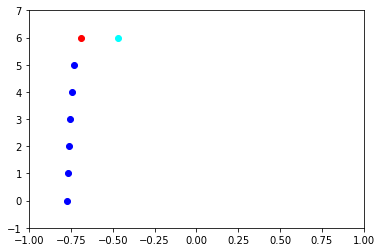

[-0.7730152   0.00189958 -0.76782731 -0.00562618 -0.76203808 -0.0139185
 -0.75464251 -0.02426908 -0.74335643 -0.04083333 -0.73034458 -0.06033333]
[-0.47020045  0.09600549]
[-0.69062058 -0.11933333]
116
loss is ...
0.13220093


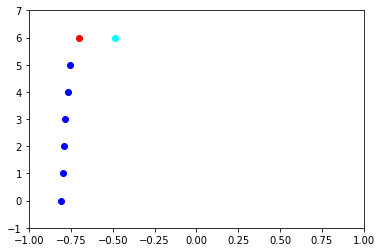

[-0.80612619 -0.02281867 -0.79955703 -0.05299733 -0.79295536 -0.08486917
 -0.783842   -0.1268725  -0.76903534 -0.19416667 -0.75259053 -0.26899999]
[-0.4881722  -0.50331545]
[-0.70311499 -0.49690002]
117
loss is ...
0.061558068


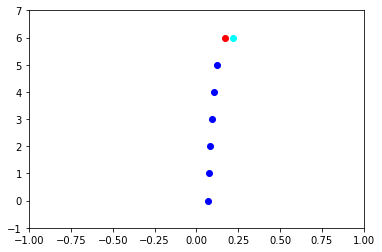

[0.06729758 0.00429947 0.07452879 0.00532477 0.08214427 0.00636197
 0.09132742 0.00762761 0.10599211 0.0095     0.12228868 0.0135    ]
[0.21750902 0.05008914]
[0.17385836 0.0225    ]
118
loss is ...
0.031398278


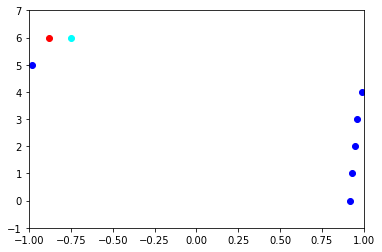

[ 0.92018226  0.02034217  0.93154155  0.03360375  0.94511618  0.04871117
  0.96192404  0.06841883  0.98855245  0.09933333 -0.98008158  0.13616666]
[-0.7496085  -0.19767065]
[-0.88170072  0.25199999]
119
loss is ...
0.10184008


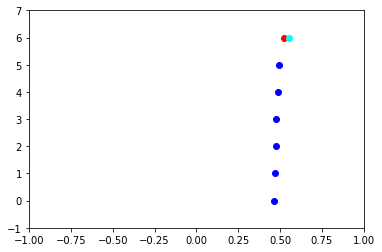

[ 0.46579628 -0.01951117  0.46947182 -0.03715042  0.47341985 -0.05661325
  0.47827816 -0.08061934  0.48600502 -0.11933333  0.49534068 -0.16550001]
[ 0.5506855  -0.11763243]
[ 0.52123634 -0.29699999]
120
loss is ...
0.05298662


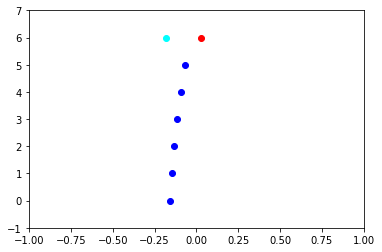

[-0.1570638   0.00720272 -0.14594418  0.011959   -0.13322714  0.01747508
 -0.11805896  0.02426825 -0.09449659  0.035      -0.06709086  0.04733333]
[-0.18230933  0.15282576]
[0.02782851 0.09133333]
121
loss is ...
0.24389124


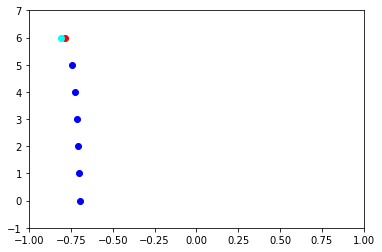

[-0.69415226 -0.01377542 -0.69982632 -0.02687175 -0.70626183 -0.04170267
 -0.71483606 -0.06069558 -0.72742522 -0.08933333 -0.74176208 -0.12233334]
[-0.8104847 -0.2195359]
[-0.78691203 -0.22699999]
122
loss is ...
0.5932971


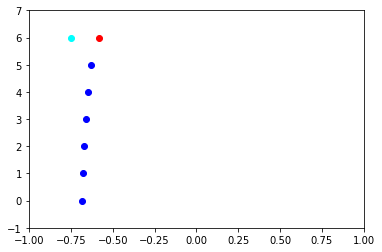

[-0.68265042  0.01281967 -0.6762903   0.025024   -0.66948203  0.03790833
 -0.66066776  0.05480392 -0.6472966   0.07983334 -0.63171928  0.11033333]
[-0.7483168   0.36608967]
[-0.58407467  0.20316667]
123
loss is ...
0.012769654


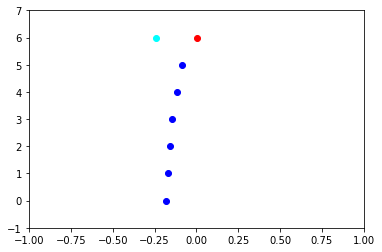

[-0.17999992 -0.00344956 -0.17014536 -0.00369011 -0.15850605 -0.00397136
 -0.14253371 -0.00425261 -0.11659864 -0.0045     -0.08844177 -0.0045    ]
[-0.24287106  0.04257166]
[ 0.00605287 -0.0065    ]
124
loss is ...
0.01470502


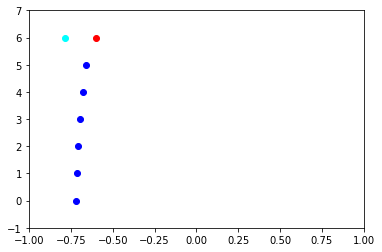

[-0.72090446 -0.00617448 -0.71401243 -0.00561198 -0.706541   -0.00509636
 -0.69614126 -0.00462761 -0.67918496 -0.0035     -0.66056655 -0.0035    ]
[-0.78205276  0.07805446]
[-6.02401742e-01 -4.99997487e-04]
125
loss is ...
0.064955704


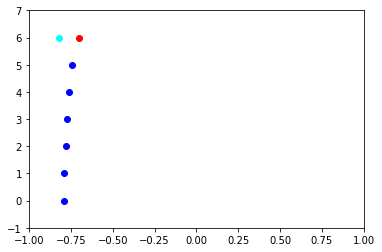

[-0.79351398  0.00478857 -0.78776145  0.01067917 -0.78128822  0.01694008
 -0.77270003  0.025068   -0.75904346  0.0385     -0.7449645   0.053     ]
[-0.8233152   0.14112213]
[-0.69817884  0.09833333]
126
loss is ...
0.025302429


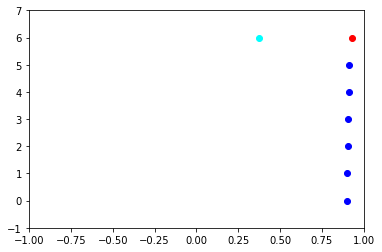

[0.89963743 0.0053776  0.90130415 0.0065026  0.90311415 0.00776822
 0.9055322  0.00940883 0.90940754 0.0115     0.91406057 0.0155    ]
[0.3752406  0.14325334]
[0.92754516 0.0235    ]
127
loss is ...
0.4966546


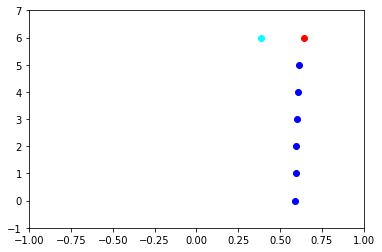

[0.5891867  0.00123665 0.59242122 0.01063575 0.59614145 0.02099367
 0.60071414 0.034305   0.60774552 0.05433333 0.61595917 0.07766666]
[0.3889745 0.3168615]
[0.64206327 0.15016666]
128
loss is ...
0.01362625


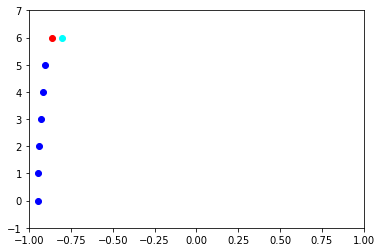

[-0.94835523  0.02068642 -0.94343168  0.05272842 -0.93735323  0.08934167
 -0.92983072  0.13453833 -0.91683722  0.20916667 -0.90311464  0.28899999]
[-0.8003575   0.46823272]
[-0.85961779  0.53950002]
129
loss is ...
0.011285625


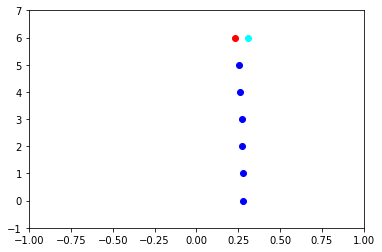

[0.28115882 0.00183916 0.27843015 0.00755087 0.27487796 0.01403842
 0.27039475 0.0219535  0.26310728 0.0345     0.25526108 0.04833333]
[0.3091422  0.08187351]
[0.2307579  0.09133333]
130
loss is ...
0.116026185


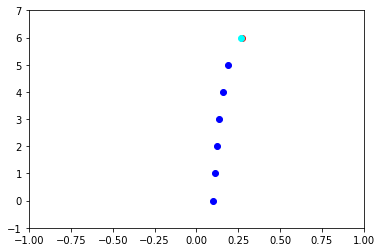

[ 0.10079645 -0.00693231  0.11206037 -0.02234242  0.12376137 -0.0396325
  0.13824539 -0.06116592  0.16104894 -0.09433333  0.18931037 -0.13516666]
[ 0.26637995 -0.30065012]
[ 0.275528   -0.25899999]
131
loss is ...
0.009555904


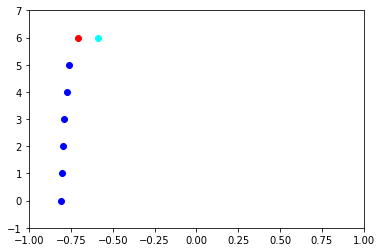

[-0.81029014 -0.0050026  -0.8038022  -0.00603386 -0.79678807 -0.00717107
 -0.78824763 -0.00875258 -0.77388171 -0.0115     -0.75783564 -0.0145    ]
[-0.58936715 -0.06128005]
[-0.70940182 -0.0245    ]
132
loss is ...
0.09550453


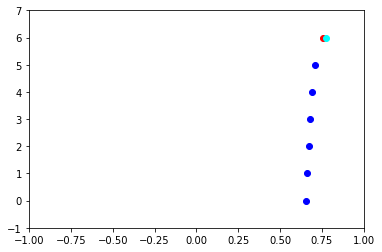

[ 0.65708463 -0.01225375  0.66324939 -0.02363475  0.67031114 -0.03659483
  0.67897832 -0.05298875  0.69286009 -0.07883333  0.70875474 -0.10833333]
[ 0.7766699  -0.16575706]
[ 0.75777996 -0.19856667]
133
loss is ...
0.013615857


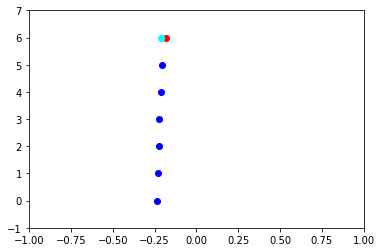

[-0.23251992  0.00692333 -0.22937819  0.01175258 -0.22576469  0.01703592
 -0.22122143  0.02369558 -0.21364543  0.0345     -0.20579999  0.04533333]
[-0.20979543  0.14959641]
[-0.18053164  0.08033333]
134
loss is ...
0.16533786


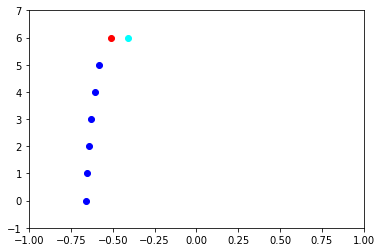

[-0.66079467 -0.01929492 -0.65083149 -0.04544875 -0.64023431 -0.07413116
 -0.62734881 -0.11040499 -0.60508084 -0.17116666 -0.58234797 -0.23399999]
[-0.4064561 -0.3970657]
[-0.50720073 -0.44299998]
135
loss is ...
0.06639259


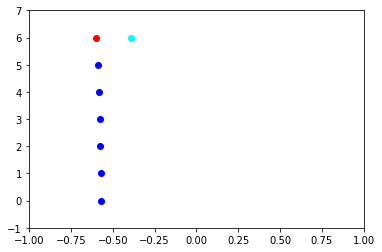

[-0.5682326  -0.00800261 -0.57030549 -0.01359842 -0.57262044 -0.02003058
 -0.57539983 -0.02777342 -0.57990969 -0.0405     -0.58500164 -0.05383333]
[-0.39065313  0.01317675]
[-0.60061873 -0.09533333]
136
loss is ...
0.21392913


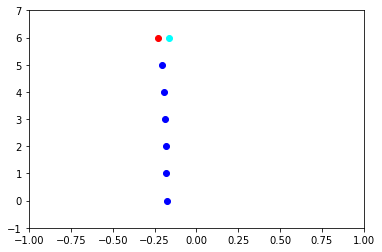

[-0.17640561  0.00396611 -0.17966025  0.01636583 -0.18302542  0.02944392
 -0.18755586  0.04597367 -0.19457542  0.07133333 -0.20307704  0.10233334]
[-0.16616923  0.2454276 ]
[-0.22855394  0.19416667]
137
loss is ...
0.087908305


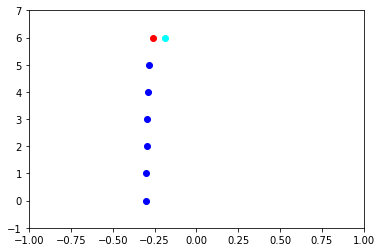

[-0.30242547  0.01541383 -0.29993963  0.03532792 -0.29717346  0.05665066
 -0.29337613  0.0838475  -0.2873259   0.12533333 -0.28003193  0.17516666]
[-0.1887411   0.34672797]
[-0.25849699  0.32283333]
138
loss is ...
0.026099358


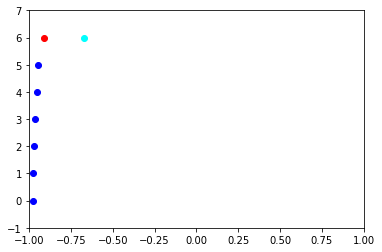

[-0.97763924 -0.00732986 -0.97354841 -0.0128205  -0.96918664 -0.0189005
 -0.96325149 -0.02685992 -0.95362398 -0.0395     -0.94357933 -0.05333333]
[-0.67237604  0.15567176]
[-0.91229539 -0.09633333]
139
loss is ...
0.24654749


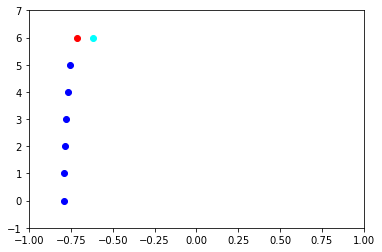

[-0.79236953  0.00103337 -0.78777503  0.01074867 -0.78266015  0.02127425
 -0.77593442  0.03493025 -0.76524704  0.05633333 -0.7530284   0.08166667]
[-0.6202897   0.21485901]
[-0.71575792  0.15816667]
140
loss is ...
0.020187255


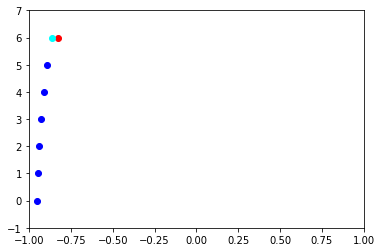

[-9.53336034e-01 -5.04948338e-03 -9.46036818e-01 -3.97135814e-03
 -9.37778499e-01 -2.94010838e-03 -9.27005936e-01 -1.76265001e-03
 -9.08854609e-01  5.00001659e-04 -8.89921238e-01  2.50000000e-03]
[-0.85981846 -0.10282332]
[-0.82750273  0.0065    ]
141
loss is ...
0.024534574


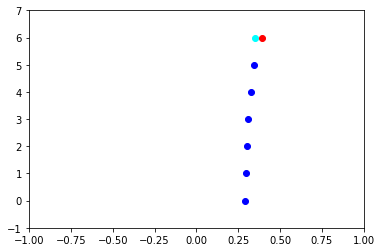

[ 0.28945387 -0.01983058  0.29538408 -0.04308542  0.30225619 -0.06865917
  0.31122522 -0.10244083  0.32544575 -0.15516666  0.34155588 -0.21416667]
[ 0.35042238 -0.16750589]
[ 0.39035537 -0.39466667]
142
loss is ...
0.023662798


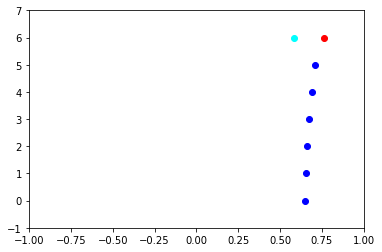

[ 0.64870352 -0.02214858  0.65545288 -0.04771842  0.6629691  -0.07652058
  0.67270123 -0.11319333  0.68882531 -0.17316667  0.70622121 -0.23649999]
[ 0.5837044 -0.1886726]
[ 0.76011626 -0.43906667]
143
loss is ...
0.011253307


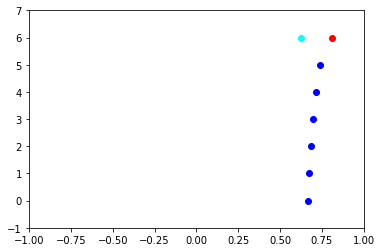

[ 0.66582501 -0.02105292  0.67489957 -0.05035158  0.68450574 -0.08274067
  0.6974752  -0.125725    0.7169915  -0.19016666  0.73977768 -0.26399999]
[ 0.6234554  -0.44062245]
[ 0.81254934 -0.50049998]
144
loss is ...
0.08941158


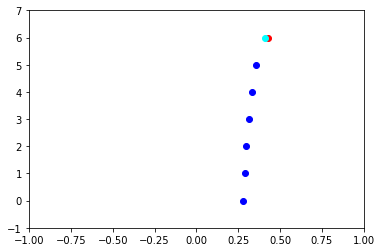

[ 0.28164951 -0.0051348   0.29009094 -0.01205067  0.29943443 -0.0200255
  0.31193313 -0.03042458  0.33122595 -0.04633333  0.35451746 -0.06433333]
[ 0.41280696 -0.13687493]
[ 0.42698222 -0.121     ]
145
loss is ...
0.01486143


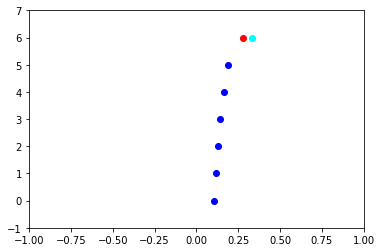

[0.10410904 0.00295853 0.11512283 0.00819579 0.12719694 0.0141775
 0.14119191 0.02179725 0.16359351 0.0345     0.18889628 0.04833333]
[0.33162847 0.09888783]
[0.27743359 0.09433333]
146
loss is ...
0.049349017


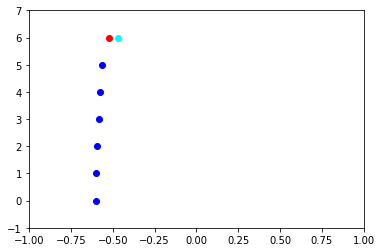

[-0.60175855  0.01075783 -0.59669811  0.01668333 -0.59119279  0.02320533
 -0.5841094   0.0316475  -0.57347933  0.04533333 -0.56106802  0.06033333]
[-0.46738628  0.26134747]
[-0.52255138  0.10733334]
147
loss is ...
0.1158162


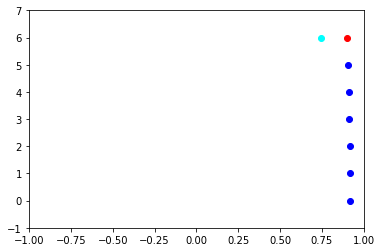

[ 0.91855696 -0.02319308  0.91729257 -0.04095517  0.91594832 -0.06048092
  0.91425556 -0.08578917  0.9116892  -0.12433333  0.9084221  -0.17116666]
[ 0.7420844 -0.7760465]
[ 0.89898977 -0.30683334]
148
loss is ...
0.045806628


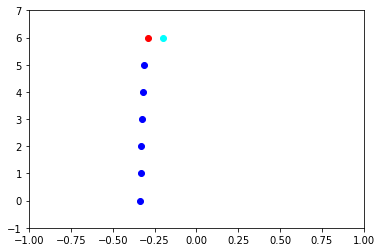

[-0.3358799   0.02285967 -0.33286095  0.04721108 -0.32939428  0.07498433
 -0.32495652  0.10978167 -0.31788761  0.16516666 -0.31032572  0.22449999]
[-0.20151247  0.45243406]
[-0.28728306  0.41133334]
149
loss is ...
0.059742846


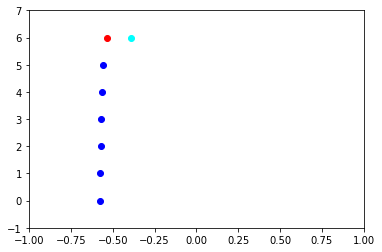

[-0.57727525  0.00447135 -0.57467239  0.01470375 -0.57158152  0.02646158
 -0.56788768  0.04056    -0.56159145  0.06333333 -0.55472221  0.08833333]
[-0.38874984  0.13315074]
[-0.53304467  0.16816667]
150
loss is ...
0.02497227


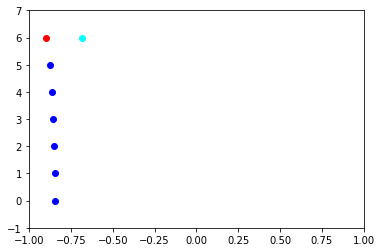

[-0.84428228  0.01513875 -0.84709984  0.03077967 -0.85084434  0.04786192
 -0.85601052  0.07043917 -0.86375442  0.10533333 -0.87276472  0.14616666]
[-0.68441385  0.13589232]
[-0.89903038  0.26466667]
151
loss is ...
0.007634471


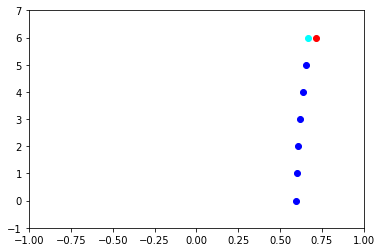

[ 0.59566824  0.00417697  0.60240939 -0.00720752  0.6100294  -0.01950117
  0.62039641 -0.03601142  0.63629359 -0.06133333  0.65449012 -0.09033333]
[ 0.66848993 -0.22551867]
[ 0.71300444 -0.18016666]
152
loss is ...
0.03272241


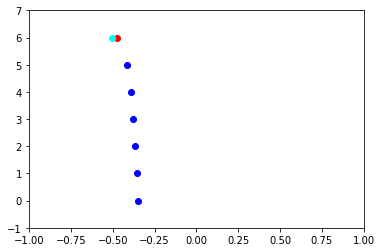

[-0.34851098  0.01163833 -0.35556143  0.02746083 -0.36417133  0.04484375
 -0.37552521  0.06755133 -0.39269903  0.10133333 -0.41375142  0.1435    ]
[-0.5013568  0.2895749]
[-0.47531467  0.27100001]
153
loss is ...
0.28558207


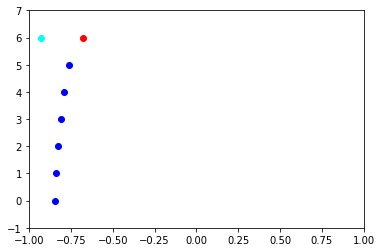

[-0.84571873 -0.00476822 -0.83666742 -0.0050026  -0.82564203 -0.00514323
 -0.81120903 -0.00533073 -0.78840071 -0.0055     -0.76111529 -0.0055    ]
[-0.9256834 -0.0943879]
[-0.6772083 -0.0055   ]
154
loss is ...
0.017183423


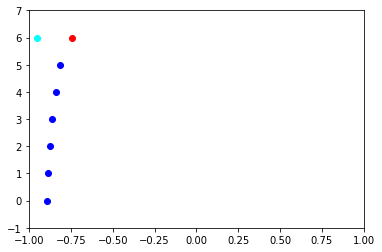

[-0.89201341 -0.01350167 -0.88336687 -0.02161875 -0.87279041 -0.03086258
 -0.85993784 -0.04248483 -0.84057698 -0.06033333 -0.81733909 -0.08333333]
[-0.9498585 -0.2010486]
[-0.74499237 -0.15449999]
155
loss is ...
0.2690769


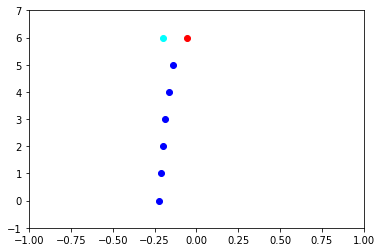

[-0.22147607  0.00322135 -0.21136234  0.00608073 -0.20023807  0.00935042
 -0.18620557  0.01362758 -0.16274088  0.0205     -0.13742079  0.0275    ]
[-0.19960953  0.13008101]
[-0.05424958  0.05090475]
156
loss is ...
0.011209355


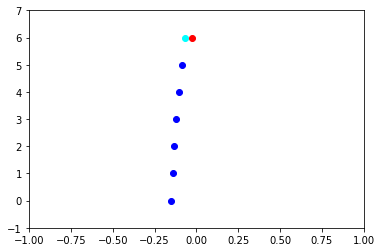

[-0.14938896  0.02006933 -0.14203921  0.03976125 -0.13365133  0.061938
 -0.12336773  0.0899575  -0.10520636  0.13550001 -0.08580054  0.18516666]
[-0.07075341  0.2730221 ]
[-0.02380826  0.34383334]
157
loss is ...
0.01982655


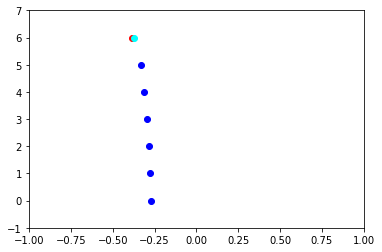

[-0.27084645  0.01459408 -0.27719476  0.03619892 -0.28480952  0.06017875
 -0.29463608  0.0904     -0.31055868  0.13916667 -0.32809321  0.19416667]
[-0.37483525  0.3795777 ]
[-0.38212016  0.36283333]
158
loss is ...
0.03366958


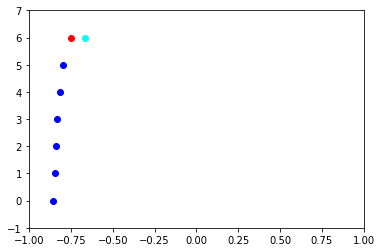

[-0.85402081 -0.02033067 -0.84710695 -0.05267942 -0.83926907 -0.089175
 -0.82983429 -0.13513833 -0.81518338 -0.21083333 -0.79930504 -0.29175001]
[-0.6670372  -0.61926395]
[-0.74682264 -0.5575    ]
159
loss is ...
0.059160132


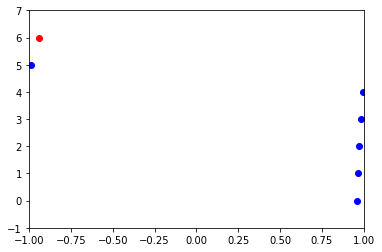

[ 0.96183317  0.01613792  0.9673914   0.03235658  0.97427714  0.05016825
  0.98262025  0.07301883  0.9957656   0.10933333 -0.98842071  0.15016666]
[-1.1897581  -0.59691304]
[-0.94035098  0.27699999]
160
loss is ...
0.09615796


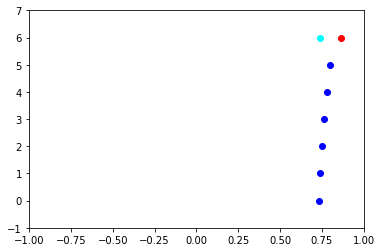

[0.7305044  0.00810346 0.7383939  0.02791542 0.74774818 0.05017958
 0.75960571 0.07806667 0.77758989 0.12133334 0.79911316 0.17216667]
[0.74147785 0.09857076]
[0.86390297 0.32823334]
161
loss is ...
0.10636437


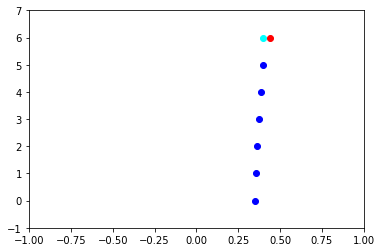

[ 0.35109269 -0.01738083  0.35728336 -0.04762392  0.36377492 -0.08092225
  0.37163454 -0.12369417  0.38424422 -0.19283333  0.39726601 -0.265     ]
[ 0.39930063 -0.47121334]
[ 0.44040054 -0.50350001]
162
loss is ...
0.08803644


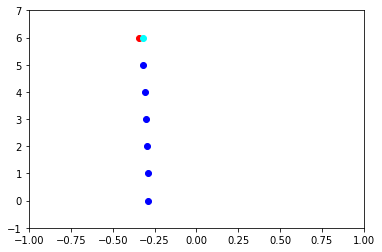

[-0.28629008  0.00687848 -0.29014107  0.01573567 -0.29408646  0.02531992
 -0.29933718  0.03758317 -0.30733095  0.05733334 -0.31606152  0.07833333]
[-0.31633753  0.23803101]
[-0.34410378  0.14616666]
163
loss is ...
0.0119579835


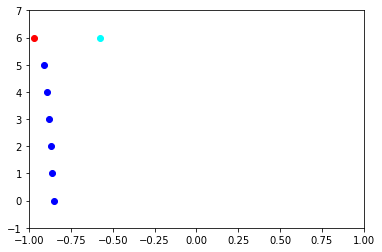

[-0.85294745  0.02133933 -0.86014913  0.03649458 -0.86776694  0.05312875
 -0.87771018  0.07458783 -0.89260033  0.10733334 -0.91175087  0.14816667]
[-0.5759365   0.32580885]
[-0.96861624  0.26800001]
164
loss is ...
0.11229094


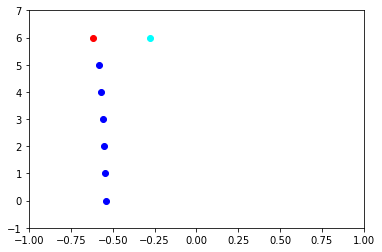

[-0.53965577  0.0084245  -0.54467647  0.01109633 -0.54986815  0.013862
 -0.5566056   0.017515   -0.56721933  0.0235     -0.57933262  0.0305    ]
[-0.27943063  0.02788958]
[-0.61510271  0.04933333]
165
loss is ...
0.048769128


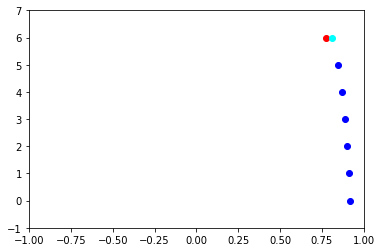

[ 0.91914882 -0.00950783  0.90992822 -0.02264425  0.89946576 -0.03745642
  0.88716078 -0.05608575  0.86812347 -0.08433333  0.84533932 -0.11866666]
[0.8087222  0.01437611]
[ 0.77277338 -0.225     ]
166
loss is ...
0.018297251


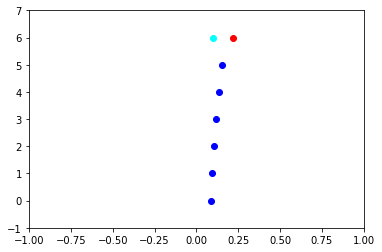

[0.08758556 0.02381383 0.09608082 0.055271   0.10451417 0.08988
 0.11571911 0.13372751 0.1346886  0.20616666 0.15473672 0.2825    ]
[0.09903434 0.40034434]
[0.22077099 0.53683334]
167
loss is ...
0.017305192


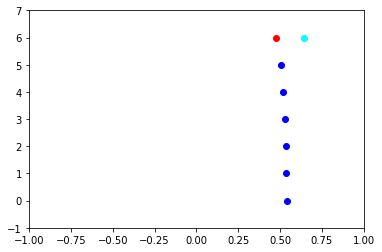

[ 0.54242516 -0.00347482  0.53798356 -0.0135565   0.53355633 -0.02469608
  0.52772963 -0.039112    0.51856464 -0.06133333  0.50752973 -0.08633333]
[ 0.64020485 -0.20862733]
[ 0.47365821 -0.16516666]
168
loss is ...
0.008744211


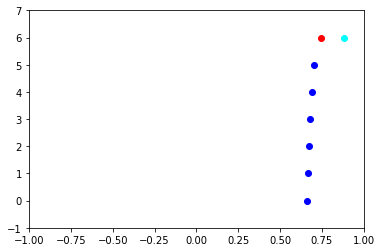

[0.65970409 0.01268417 0.66522725 0.02484533 0.67143339 0.03845392
 0.67904011 0.055634   0.6913946  0.08266666 0.70493407 0.11333333]
[ 0.88135505 -0.0068555 ]
[0.74673146 0.20716667]
169
loss is ...
0.15725413


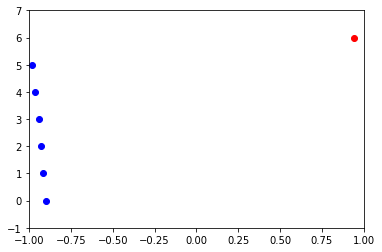

[-0.89782784  0.39236168 -0.91543697  0.39320582 -0.92712719  0.39409665
 -0.94130219  0.39522166 -0.96197565  0.39766668 -0.98452485  0.40066666]
[-1.3229697  0.5805965]
[0.94436964 0.40766668]
170
loss is ...
0.0994502


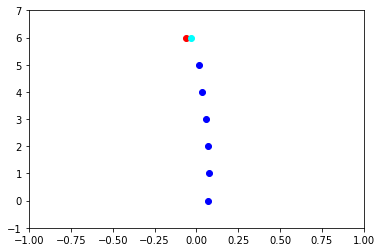

[ 0.07192946 -0.02396583  0.07413874 -0.04848     0.06803811 -0.07350025
  0.05650519 -0.10747833  0.03616508 -0.16216667  0.01373758 -0.22033333]
[-0.03181008 -0.48181927]
[-0.06406749 -0.41506666]
171
loss is ...
0.09632694


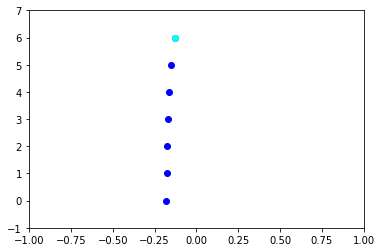

[-0.18095433  0.01435375 -0.17731992  0.0330995  -0.1738245   0.05293092
 -0.1690545   0.07886258 -0.16149568  0.11933333 -0.15262444  0.16616666]
[-0.12495798  0.26369938]
[-0.12597536  0.30516668]
172
loss is ...
0.09481372


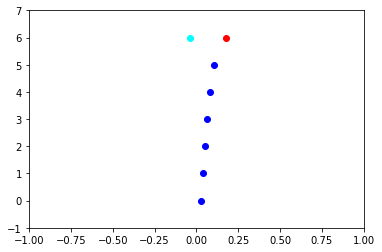

[0.03062761 0.02499858 0.03957426 0.05572542 0.0492202  0.09101334
 0.06123868 0.13387333 0.08120312 0.20416667 0.10379243 0.28199999]
[-0.03917658  0.6171427 ]
[0.17627979 0.53333333]
173
loss is ...
0.042396583


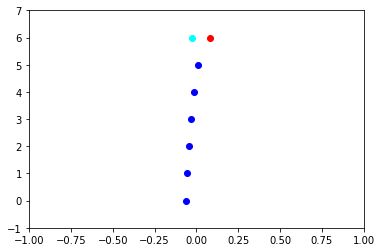

[-0.06444406 -0.02389625 -0.056128   -0.04559342 -0.04677032 -0.06802783
 -0.03382622 -0.09769833 -0.01302655 -0.14716667  0.00912543 -0.19916667]
[-0.02830215 -0.34613276]
[ 0.08044032 -0.36703334]
174
loss is ...
0.22952428


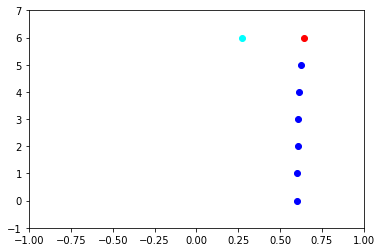

[ 0.6001205  -0.03175458  0.60295002 -0.06606183  0.6058105  -0.10409833
  0.60976075 -0.15314083  0.61572056 -0.2275      0.6227075  -0.31783333]
[ 0.27540565 -0.55729324]
[ 0.64311838 -0.57866669]
175
loss is ...
0.2448134


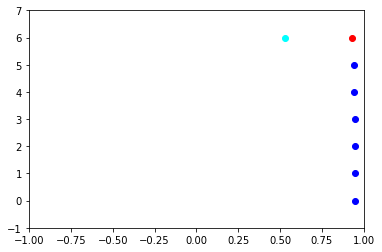

[ 0.94951777 -0.01176908  0.94830815 -0.03137642  0.94694615 -0.05196075
  0.94509216 -0.07836133  0.94209577 -0.12133334  0.93881933 -0.16916667]
[ 0.5297449  -0.63183767]
[ 0.92867142 -0.31283333]
176
loss is ...
0.0325901


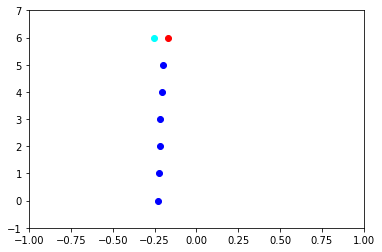

[-0.22742223  0.00092448 -0.22353158 -0.00176823 -0.21965434 -0.0047027
 -0.21441397 -0.00847133 -0.2058817  -0.0145     -0.19694267 -0.0215    ]
[-0.25265625 -0.09880196]
[-0.16943744 -0.04233333]
177
loss is ...
0.017514383


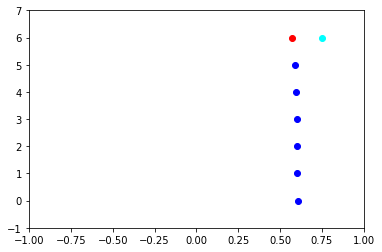

[0.60617811 0.02286842 0.60385684 0.05507509 0.60157866 0.09089417
 0.59880065 0.13598916 0.59411872 0.21016666 0.58936462 0.28600001]
[0.75180644 0.40719342]
[0.57406899 0.52950002]
178
loss is ...
0.026264245


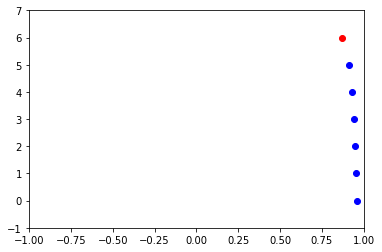

[9.60562842e-01 7.14899153e-04 9.54632518e-01 1.09733335e-02
 9.48087565e-01 2.17632500e-02 9.39860890e-01 3.57401657e-02
 9.27687092e-01 5.73333359e-02 9.13283390e-01 8.23333359e-02]
[1.0320561  0.26953807]
[0.86895093 0.15916667]
179
loss is ...
0.13247639


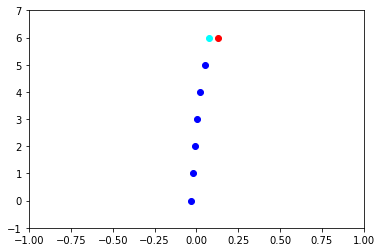

[-0.02944512 -0.00407213 -0.01976058 -0.02137042 -0.00931289 -0.04042208
  0.00409618 -0.06487433  0.02452487 -0.10133333  0.04946273 -0.14616666]
[ 0.07486846 -0.31379637]
[ 0.12652509 -0.28483332]
180
loss is ...
0.14020349


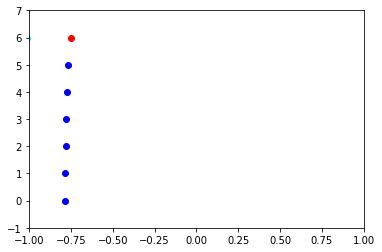

[-0.78612215  0.01058417 -0.78324921  0.015816   -0.78050714  0.02145575
 -0.77709809  0.02869542 -0.77167151  0.0405     -0.76595406  0.05333333]
[-1.0117941  0.1763424]
[-0.74779141  0.09333333]
181
loss is ...
0.019386142


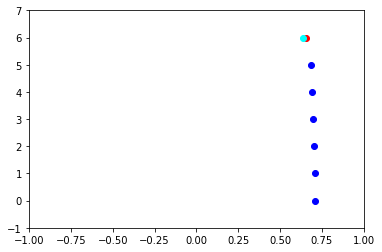

[0.71087341 0.00762761 0.70744874 0.00918875 0.70357866 0.010862
 0.69881122 0.01301825 0.69095607 0.0165     0.68259923 0.0205    ]
[0.6342424  0.25479683]
[0.65604896 0.0325    ]
182
loss is ...
0.15751427


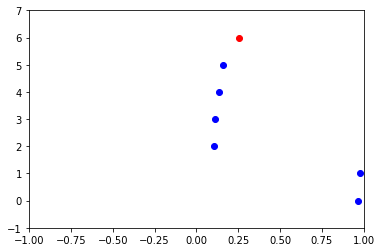

[0.96348106 0.00910367 0.97574109 0.02543892 0.1070901  0.10306
 0.11419167 0.12612417 0.13497419 0.16316667 0.1615586  0.20416667]
[-1.3290244  -0.31711298]
[0.2566311  0.33883334]
183
loss is ...
0.076501854


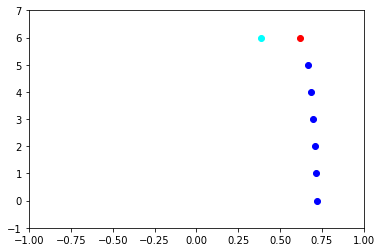

[0.72123417 0.02345    0.71488419 0.05223758 0.70780612 0.084125
 0.69886538 0.12429501 0.68427563 0.18983334 0.66872055 0.26033333]
[0.383791  0.3602145]
[0.61886921 0.48549998]
184
loss is ...
0.041725628


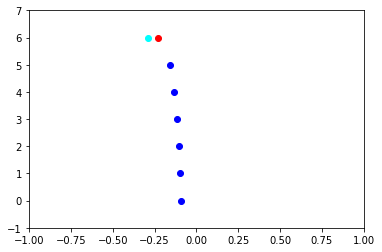

[-0.0940676  -0.03362067 -0.09495586 -0.06320709 -0.10229655 -0.09681417
 -0.11356595 -0.13958666 -0.13326733 -0.2075     -0.15555661 -0.28399999]
[-0.29029247 -0.5305905 ]
[-0.22874101 -0.5301    ]
185
loss is ...
0.05604587


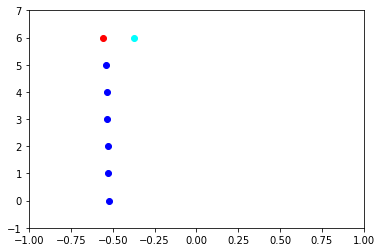

[-0.52401076  0.011736   -0.52608749  0.02419783 -0.5283666   0.03806167
 -0.53115752  0.0554265  -0.5353927   0.082      -0.54044858  0.11433333]
[-0.37385207  0.02799301]
[-0.55543668  0.20716667]
186
loss is ...
0.050474714


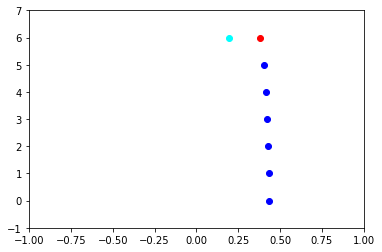

[0.43454465 0.00616102 0.43110969 0.02513683 0.42706394 0.04708992
 0.42192689 0.07395083 0.41429604 0.11533333 0.40482192 0.16516666]
[0.19732924 0.24966697]
[0.37734103 0.31083333]
187
loss is ...
0.008928921


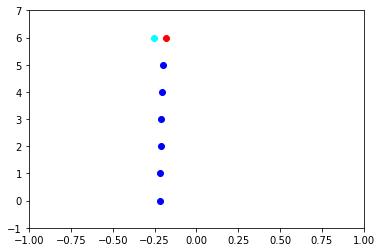

[-0.21774534  0.00359635 -0.21543231  0.00359635 -0.21296402  0.00364323
 -0.20987369  0.0036901  -0.20446975  0.0035     -0.19893048  0.0045    ]
[-0.2509079  -0.02435084]
[-0.18173114  0.0055    ]
188
loss is ...
0.005532387


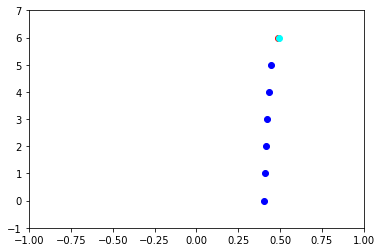

[ 0.40701793 -0.01723733  0.41223959 -0.03182917  0.41769188 -0.04805225
  0.42458733 -0.06898875  0.43542726 -0.10233334  0.44817691 -0.14016666]
[ 0.4964675  -0.18216652]
[ 0.48738886 -0.255     ]
189
loss is ...
0.21916504


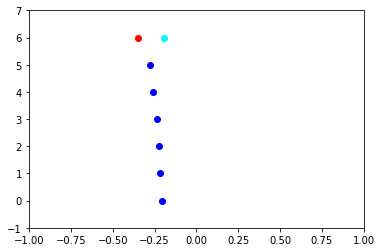

[-0.20720961 -0.01695617 -0.21581437 -0.04494325 -0.22581751 -0.07642733
 -0.23788037 -0.11541    -0.25833473 -0.18216667 -0.27931896 -0.25      ]
[-0.19098641 -0.49646443]
[-0.34834063 -0.48049998]
190
loss is ...
0.10459454


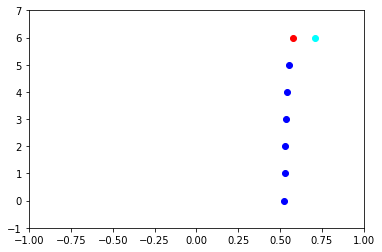

[0.52580327 0.00669391 0.52860678 0.01647208 0.53195813 0.02729042
 0.53648313 0.04175575 0.54319377 0.06333333 0.55076711 0.08733334]
[0.7063694 0.2539699]
[0.57471229 0.16283333]
191
loss is ...
0.017704302


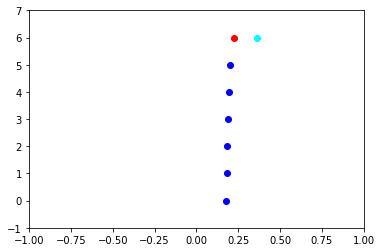

[ 0.178302   -0.01195342  0.1810414  -0.02735242  0.1842692  -0.04463075
  0.1884708  -0.06672375  0.19508326 -0.102       0.20287085 -0.1415    ]
[ 0.3614612 -0.3174851]
[ 0.22587721 -0.25800001]
192
loss is ...
0.037773866


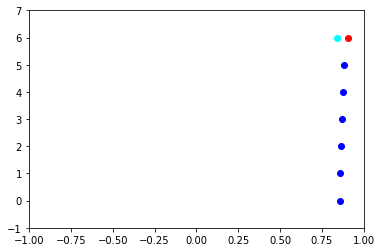

[ 0.85662987 -0.00973842  0.85975602 -0.02096925  0.86330765 -0.03354225
  0.8678174  -0.04907483  0.87486589 -0.07333333  0.88301797 -0.10233334]
[ 0.8385155  -0.12496315]
[ 0.90732572 -0.18716667]
193
loss is ...
0.044442516


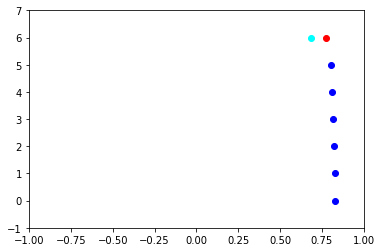

[0.82915151 0.01919725 0.82581301 0.03989008 0.82227129 0.06215342
 0.81774062 0.08996084 0.81023528 0.13416667 0.80162795 0.18516666]
[0.6859325  0.37843397]
[0.776131   0.33683334]
194
loss is ...
0.028175801


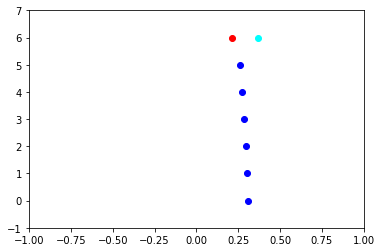

[ 0.3078278  -0.00289322  0.3019809  -0.00672402  0.29584674 -0.01103475
  0.28755971 -0.01666817  0.27467441 -0.0255      0.2597568  -0.0355    ]
[ 0.36643884 -0.13572448]
[ 0.21230935 -0.06733334]
195
loss is ...
0.02293549


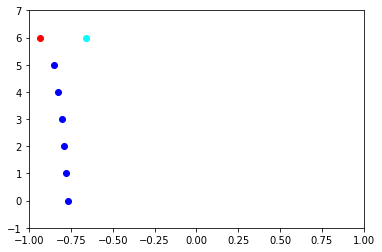

[-0.76726839  0.00087662 -0.779224    0.01261883 -0.79127591  0.02556817
 -0.80544548  0.0421395  -0.82726355  0.068      -0.85191745  0.09733334]
[-0.66127205 -0.07971406]
[-0.93209122  0.19716667]
196
loss is ...
0.012502613


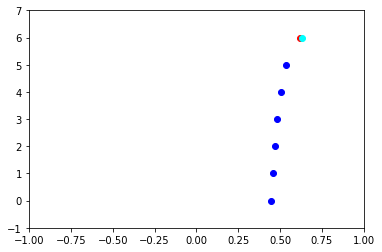

[ 0.44563835 -0.0156715   0.45648588 -0.03389042  0.46770882 -0.05392075
  0.48129837 -0.07890558  0.50463297 -0.11833333  0.53371694 -0.17016666]
[ 0.6324257  -0.26867694]
[ 0.61957221 -0.32183334]
197
loss is ...
0.024635999


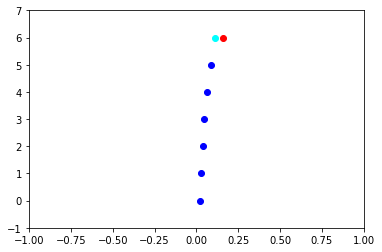

[0.01897913 0.01208167 0.02750981 0.0311425  0.03697731 0.05252858
 0.04811858 0.07808775 0.06585139 0.119      0.08781311 0.16891666]
[0.11211693 0.47458324]
[0.15656498 0.3225    ]
198
loss is ...
0.20181175


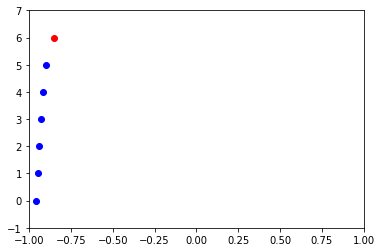

[-9.56234064e-01 -7.34635830e-03 -9.45738835e-01 -5.94010830e-03
 -9.37192065e-01 -4.39323346e-03 -9.28041062e-01 -2.47135838e-03
 -9.13835014e-01  5.00001659e-04 -8.98249362e-01  4.50000008e-03]
[-1.3178554   0.13547401]
[-0.85133909  0.0155    ]
199


In [4]:
counter = 0;
batch_size = 20
session = tf.Session()
session.run (tf.global_variables_initializer())
mseList = []

with tf.name_scope('summaries'):
    tf.summary.scalar ('loss', mean_squared_error)
    tf.summary.histogram ('histogram_loss', mean_squared_error)
    summary_op = tf.summary.merge_all()

#saver = tf.train.Saver ()
#writer = tf.summary.FileWriter('./logs/layer-fc34/', session.graph)
#ckpt = tf.train.get_checkpoint_state(os.path.dirname('./checkpoints/layer-fc34/'))
#if (ckpt and ckpt.model_checkpoint_path):
    #saver.restore(session, ckpt.model_checkpoint_path)

for batch in next_batch (10,batch_size,5, ideal = True, full_data=True):
    batch_array = np.array (batch[0])[:,:input_layers,1:3]
    batch_truth_array = np.array (batch[1])[:,input_layers,1:3]

    for i in range(len(batch_array)):
        batch_truth_array[i,0] = batch_truth_array[i,0]/np.pi
        batch_truth_array[i,1] = batch_truth_array[i,1]/1200
        for j in range(len(batch_array[i])):
            batch_array[i,j,0] = batch_array[i,j,0]/np.pi 
            batch_array[i,j,1] = batch_array[i,j,1]/1200 
    batch_array_flattened = [batch_array[i].flatten() for i in range(len(batch_array))]
    batch_array_flattened = np.array (batch_array_flattened)    

    print ("loss is ...")
    prediction = session.run (y, feed_dict = {x:batch_array_flattened[0:1]})
    loss = session.run (mean_squared_error, feed_dict = {x:batch_array_flattened, y_target:batch_truth_array})
    print (loss)
    mseList.append (loss)
    _, summary = session.run ([minimize_op, summary_op], feed_dict = {x:batch_array_flattened, y_target:batch_truth_array})
    
    plt.scatter (batch_array[0][:,0], range (input_layers), color = 'blue')
    plt.scatter (batch_truth_array[0,0], input_layers, color = 'red')
    plt.scatter (prediction[0,0], input_layers, color = 'cyan')
    plt.axis ([-1,1,-1,input_layers+1])
    plt.show ()
    print (batch_array_flattened[0])
    print (prediction[0])
    print (batch_truth_array[0])
    print (counter)

    #writer.add_summary (summary, global_step = counter)
        
    #if (counter%50 == 0):
        #saver.save (session, './checkpoints/layer-fc34/', counter)
    
    counter += 1
    if (counter >= 200):
        break
        


session.close()

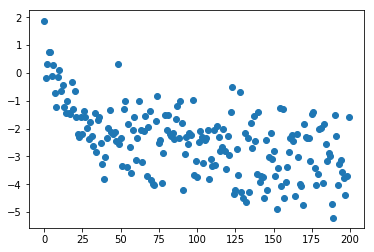

In [5]:
plt.scatter (range(len(mseList)), np.log(mseList))
plt.show()

In [6]:
with200 = .20542066
print (with200)

0.20542066


In [7]:
with400 = .14199664
print (with400)

0.14199664


In [8]:
withExtraLayer = .120682366
print (withExtraLayer)

0.120682366


In [9]:
withLowerLearningRate = .11972042
print (withLowerLearningRate)

0.11972042


In [10]:
withGradientDescent = .1327484
print (withGradientDescent)

0.1327484
